<img src="pic.png"> <br>
<b>Notebook by Ritwik Raj and Ritesh Kumar</b>

#### The ever-present challenge for consumer finance companies lies in balancing the need to grow their business with the risk of loan defaults.  

Our company, a leading online loan provider, is no exception. While we strive to offer accessible loan options to urban customers, we must also make informed decisions to minimize credit losses.

<b>Our Objective ?</b> <br>

It is to leverage historical loan data to identify patterns that predict loan default risk . By developing an understanding of the key factors that influence default , we can significantly improve our risk assessment strategies . 

The path forward includes analysing applicants and loan attributes , aiming to uncover hidden trends that differentiate between responsible borrowers and those likely to default.  Equipped with these insights, we can make data-driven decisions regarding loan approvals, terms, and portfolio management.  

<b>Desired Outcomes :</b>
* Reduce credit loss by denying loans to high-risk applicants
* Adjusting loan terms (amount, interest rate) based on risk 

<b>Ultimately, our goal is to achieve sustainable growth while minimizing the financial impact of defaults – a win-win scenario for both our company and our valued customers. 

In [450]:
# Importing all the libraries required 
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

# Reading the dataset 
loan_data = pd.read_csv("loan.csv")
display(loan_data.head())
# Data info and description 
print(f"Shape of the dataset : {loan_data.shape}")
print()
display(loan_data.info())
display(loan_data.describe())

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

Shape of the dataset : (39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


None

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

## Data Preprocessing - Missing Data

In [451]:
# Percentage of missing values 

((loan_data.isnull().sum() / loan_data.shape[0])*100).sort_values(ascending=False)[:56]

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

##### Inference 
* 56 of the 111 columns entirely have null values . Dropping these columns . 

In [452]:
print(f"Shape of the dataset : {loan_data.shape}")

to_drop = ((loan_data.isnull().sum() / loan_data.shape[0])*100).sort_values(ascending=False)[:56].index.tolist()
loan_data = loan_data.drop(columns=to_drop, axis=1)
print(f"Shape of the dataset after processing : {loan_data.shape}")

Shape of the dataset : (39717, 111)
Shape of the dataset after processing : (39717, 55)


Dropping rows with missing values and checking its impact on the size of the dataset . 

In [453]:
print("Shape before dropping rows ")
print(loan_data.shape)
print()
print("Shape after dropping the rows ")
loan_data.dropna(axis=0).shape

Shape before dropping rows 
(39717, 55)

Shape after dropping the rows 


(8238, 55)

As can be seen , a lot of data gets removed if rows with missing values are removed , therefore abandoning this idea .

In [454]:
# Checking the columns remaining 
print("Columns left :")
print(loan_data.columns)
print()
print(f"Shape of the dataset : {loan_data.shape}")

Columns left :
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Sh

We are left with 55 columns , out of a possible 111 colummns . As can be seen , the target columns (loan_amnt, loan_status) are still present . 

In [455]:
print(f"Are there any more missing values : {loan_data.isna().any().any()}")

Are there any more missing values : True


In [456]:
loan_data.isnull().sum().sort_values(ascending=False)[:15]

mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
dtype: int64

In [457]:
# Investigating "mths_since_last_delinq" and "desc"
loan_data[['mths_since_last_delinq', 'desc']]

mths_since_last_delinq  \
0                         NaN   
1                         NaN   
2                         NaN   
3                        35.0   
4                        38.0   
...                       ...   
39712                     0.0   
39713                     5.0   
39714                     0.0   
39715                     0.0   
39716                    11.0   

                                                    desc  
0        Borrower added on 12/22/11 > I need to upgra...  
1        Borrower added on 12/22/11 > I plan to use t...  
2                                                    NaN  
3        Borrower added on 12/21/11 > to pay for prop...  
4        Borrower added on 12/21/11 > I plan on combi...  
...                                                  ...  
39712  Our current gutter system on our home is old a...  
39713  The rate of interest and fees incurred by carr...  
39714                                                NaN  
39715                                                NaN  
39716  I plan to consolidate over $7,000 of debt: a c...  

[39717 rows x 2 columns]

##### Inference
* "mths_since_last_delinq" : The number of months since the borrower's last delinquency.
    This field gives us an idea about the time that has passed , in months , since the borrower was last late on a loan payment . 

    There are a lot of missing values in this feature , hence dropping column 

* "desc" : Loan description provided by the borrower

    Apart from the large number of missing values , we could still have extracted data from the description but that is outside the scope of this project . Hence dropping this column . 


In [458]:
loan_data.drop(columns=['mths_since_last_delinq', 'desc'], axis=1, inplace=True)

Checking out the percentage of missing values that various columns with missing values constitute of .

In [459]:
((loan_data.isnull().sum() / loan_data.shape[0]) * 100).sort_values(ascending=False)[:15] # top 15 results

emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
total_rec_prncp               0.000000
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_acc                     0.000000
dtype: float64

'emp_title' constitutes ~6% of the data , and 'emp_length' ~3% . Hard to drop such values . 

Checking the number of unique employment titles and employement lengths . 

In [460]:
print(f"There are {loan_data['emp_title'].nunique()} unique employement titles.")
print(f"There are {loan_data['emp_length'].nunique()} unique employement length.")

There are 28820 unique employement titles.
There are 11 unique employement length.


There are a lot of employment_titles , we can group them into low, mid and high income groups . 

For the sake of simplicity , we'll drop 'emp_titles' .

In [461]:
loan_data.drop(columns=['emp_title'], axis=1, inplace=True)

In [462]:
# Performing processing on emp_length 

loan_data['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

##### Inference 
Since there is no clear mode here (10+ years comprises of a lot of different years , while the rest are individual years) . 

Therefore , we cannot use the "mode" to replace missing values . 

Therefore dropping the rows with missing values in the 'emp_length' column 

In [463]:
loan_data.dropna(axis=0, subset='emp_length', inplace=True)

<b>Dropping rows for the rest of the dataset  </b>

In [464]:
print(f"Shape of the dataset :{loan_data.shape}")

loan_data.dropna(axis=0, inplace=True)

print(f"Shape of the dataset after :{loan_data.shape}")

Shape of the dataset :(38642, 52)
Shape of the dataset after :(37823, 52)


In [465]:
# Rechecking if any missing values 

print(f"Are there any missing values left : {loan_data.isna().any().any()}")
print(f"Final shape of the dataset : {loan_data.shape}")
loan_data.head(3)

Are there any missing values left : False
Final shape of the dataset : (37823, 52)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0          9                   f        0.0            0.0  5863.155187   
1          4                   f        0.0            0.0  1008.710000   
2         10                   f        0.0            0.0  3005.666844   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                 0.0   
1          1008.71           456.46         435.17                 0.0   
2          3005.67          2400.00         605.67                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   

  last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0             May-16                         0.0            1   
1             Sep-13                         0.0            1   
2             May-16                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0

## Performing Exploratory Data Analysis 

It is always a good idea , especially with classification problems , to do a count plot to explore the actual balancing of your labels (the target column) . 

<b>Our target variable is the 'loan_status' field . Checking its distribution using a countplot</b>

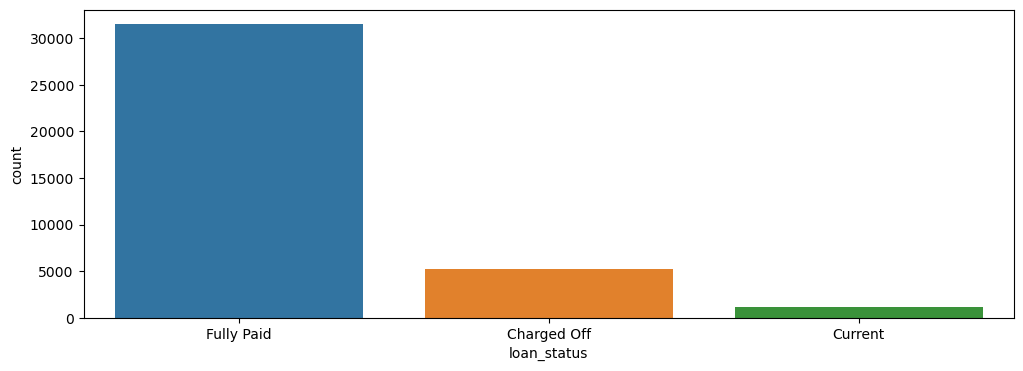

In [466]:
plt.figure(figsize=[12, 4])
sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

#### Inference : 
* A significant majority of the customers have successfully paid back their loans . 

* Loan Performance : The data suggests that most loans are repaid , however , the presence of charged-off loans highlights the need for risk management and potenitally improving credit evaluation processes to minimize defaults .

For our problem here , we will remove the "Current" value from the loan_status feature , since it does not give us a definitive answer based on the occurences that have happened prior to it .

In [467]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

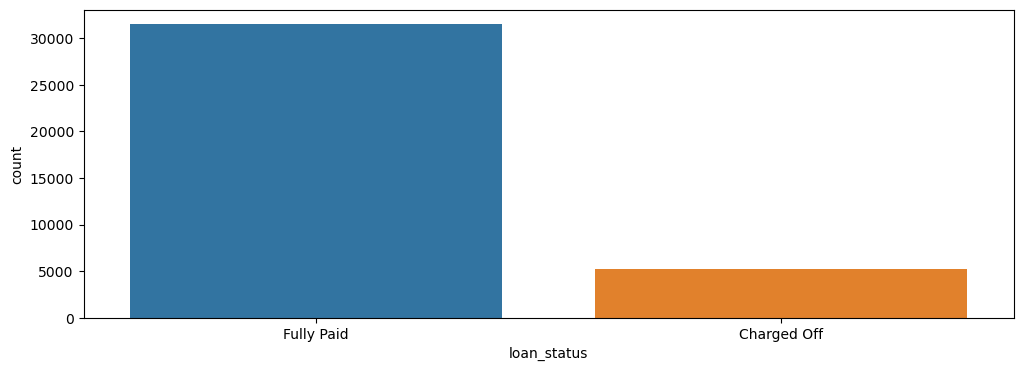

In [468]:
plt.figure(figsize=[12, 4])
sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

##### Inference : 

- Unbalanced problem - A lot more entries of people that pay off their loans than those that do not .<br>
Very common with classification problems that deal with fraud or spam , where the instances of illegitmiacy is a lot less . <br>

<b>Also checking the distribution of loan_amount </b>

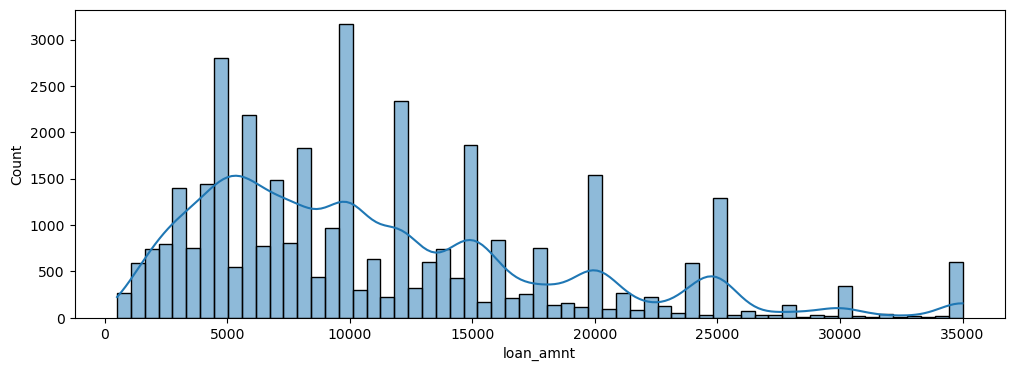

In [469]:
plt.figure(figsize=[12,4])
sns.histplot(data=loan_data, x='loan_amnt', kde=True); 

#### Inference : 
* Most loans are below $20,000 and prominent peaks around $5,000 , $10,000 and $15,000 , indicating these are common amounts requested by the borrowers .

* There are fewer loans above $25,000 , suggesting that higher amount loans are less common , which can be further solidified by the smoother KDE curve as the amount increases .

#### Unique values in each column 

In [470]:
loan_data.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
out_prncp_inv                     1
out_prncp                         1
initial_list_status               1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       48
issue_d                          51
total_acc                        81
last_pymnt_d                

#### Inference : 

Eliminating Single-Valued Columns : Single-valued columns, which contain only one unique value, provide no variation and therefore no useful information for analysis. 

Removing these columns helps simplify your dataset and focus on features that contribute meaningful information.


In [471]:
# Checking the features with single values

loan_data[loan_data.nunique()[loan_data.nunique() == 1].index.to_list()].head()

pymnt_plan initial_list_status  out_prncp  out_prncp_inv  \
0          n                   f        0.0            0.0   
1          n                   f        0.0            0.0   
2          n                   f        0.0            0.0   
3          n                   f        0.0            0.0   
5          n                   f        0.0            0.0   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
5                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  delinq_amnt  tax_liens  
0                       0.0            0        0.0  
1                       0.0            0        0.0  
2                       0.0            0        0.0  
3                       0.0            0        0.0  
5                       0.0            0        0.0

In [472]:
# Dropping the columns

loan_data.drop(columns = loan_data.nunique()[loan_data.nunique() == 1].index.to_list() , axis=1 , inplace=True)

print(f"Current size of the dataset : {loan_data.shape}")
loan_data.head()

Current size of the dataset : (36725, 41)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11   Fully Paid   
1     Source Verified  Dec-11  Charged Off   
2        Not Verified  Dec-11   Fully Paid   
3     Source Verified  Dec-11   Fully Paid   
5     Source Verified  Dec-11   Fully Paid   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
5  https://lendingclub.com/browse/loanDetail.acti...         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
5            0           Nov-04               3         9        0       7963   

  revol_util  total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0     83.70%          9   5863.155187          5833.84          5000.00   
1      9.40%          4   1008.710000          1008.71           456.46   
2     98.50%         10   3005.666844          3005.67          2400.00   
3        21%         37  12231.890000         12231.89         10000.00   
5     28.30%         12   5632.210000          5632.21          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0  
2       Jun-14           649.91             May-16                   0.0  
3       Jan-15           357.48             Apr-16                   0.0  
5       Jan-15           161.03             Jan-16                   0.0

Dropping columns with unique values (eg: 'id', 'member_id' etc.) equal to the shape of the dataset

In [473]:
loan_data.nunique().sort_values(ascending=False)[:10]

id                 36725
url                36725
member_id          36725
total_pymnt        35002
total_pymnt_inv    34698
last_pymnt_amnt    33052
total_rec_int      32571
revol_bal          20760
title              18375
installment        14364
dtype: int64

In [474]:
loan_data.drop(columns=loan_data.nunique().sort_values(ascending=False)[:3].index.to_list(),axis=1,inplace=True)

print(f"Current size of the dataset : {loan_data.shape}")

Current size of the dataset : (36725, 38)


In [475]:
loan_data.head(3)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   

   pub_rec  revol_bal revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648     83.70%          9  5863.155187          5833.84   
1        0       1687      9.40%          4  1008.710000          1008.71   
2        0       2956     98.50%         10  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0

##### Using correlation to keep the important features from this cleaned data and discarding the rest 

Converting the target variable ('loan_status') into a numerical column

In [476]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     31524
Charged Off     5201
Name: count, dtype: int64

Removing the 'Current' value from the "loan_status" column as it does not give us a definite answer w.r.t all the other features present in the dataset (like "Charged Off" or "Fully Paid")

In [477]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [478]:
# Converting 'loan_status' into numerical column 
loan_data['loan_status_num'] = loan_data['loan_status'].apply(lambda x : 1 if x == 'Fully Paid' else 0)

In [479]:
loan_data.corr(numeric_only=True)['loan_status_num'].sort_values(ascending=False)

loan_status_num            1.000000
total_rec_prncp            0.330935
total_pymnt                0.230641
total_pymnt_inv            0.229099
last_pymnt_amnt            0.220947
annual_inc                 0.038399
total_acc                  0.018287
open_acc                   0.003979
revol_bal                 -0.008690
delinq_2yrs               -0.016787
total_rec_int             -0.018994
installment               -0.028202
dti                       -0.043840
pub_rec_bankruptcies      -0.044851
funded_amnt_inv           -0.046128
pub_rec                   -0.049411
funded_amnt               -0.059538
loan_amnt                 -0.062819
inq_last_6mths            -0.068046
total_rec_late_fee        -0.168455
collection_recovery_fee   -0.204731
recoveries                -0.342312
Name: loan_status_num, dtype: float64

<Axes: >

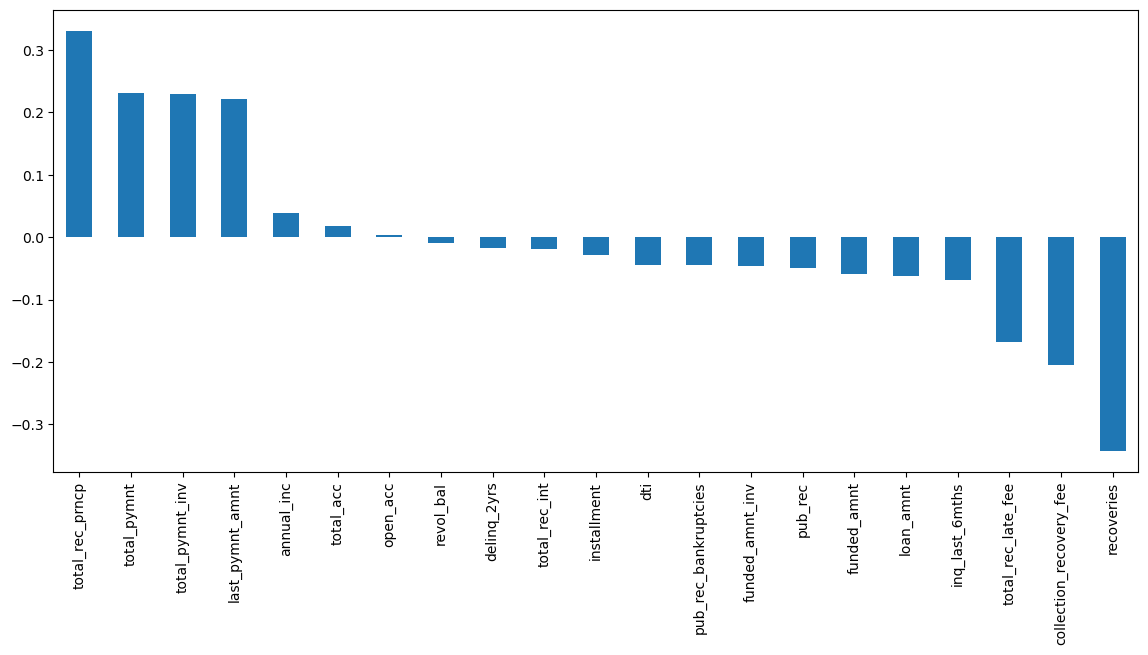

In [480]:
plt.figure(figsize=[14,6])
loan_data.corr(numeric_only=True)['loan_status_num'].sort_values(ascending=False)[1:].plot(kind='bar')

#### Inference 

* It doesnt show a strong correlation with any other feature . 

<b>Testing on the 'loan_amnt' feature </b>

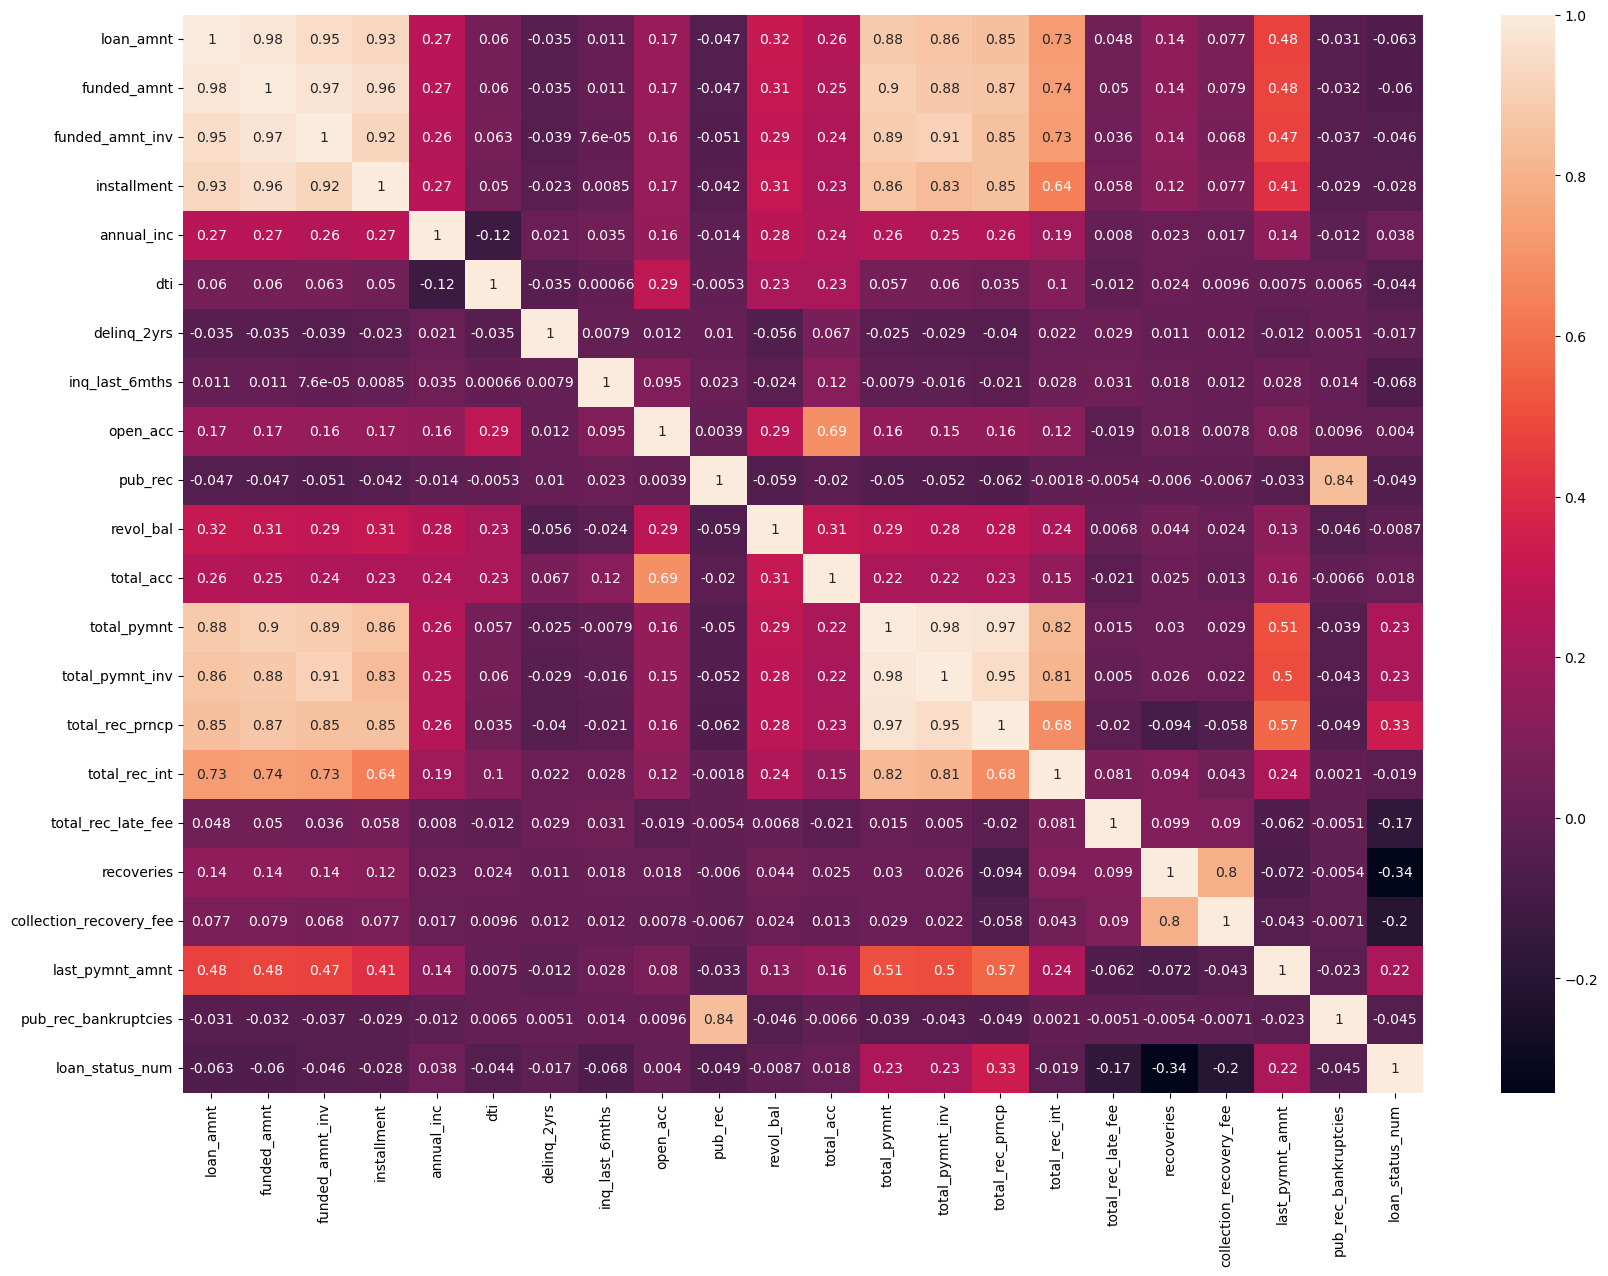

In [481]:
plt.figure(figsize=[20,14])
sns.heatmap(loan_data.corr(numeric_only=True), annot=True);

#### Inference 

* Strong Positive Correlations :

   - 'loan_amnt' and 'funded_amnt_inv' (0.95): This indicates that the amount loaned is highly correlated with the invested amount.

   - 'loan_amnt' and 'installment' (0.93): The loan amount is highly correlated with the installment amount.

   - 'installment' and 'funded_amnt_inv' (0.92): The installment amount is highly correlated with the invested amount.

   - 'pub_rec' and 'pub_rec_bankruptcies' (0.84): Public records are strongly correlated with public record bankruptcies.

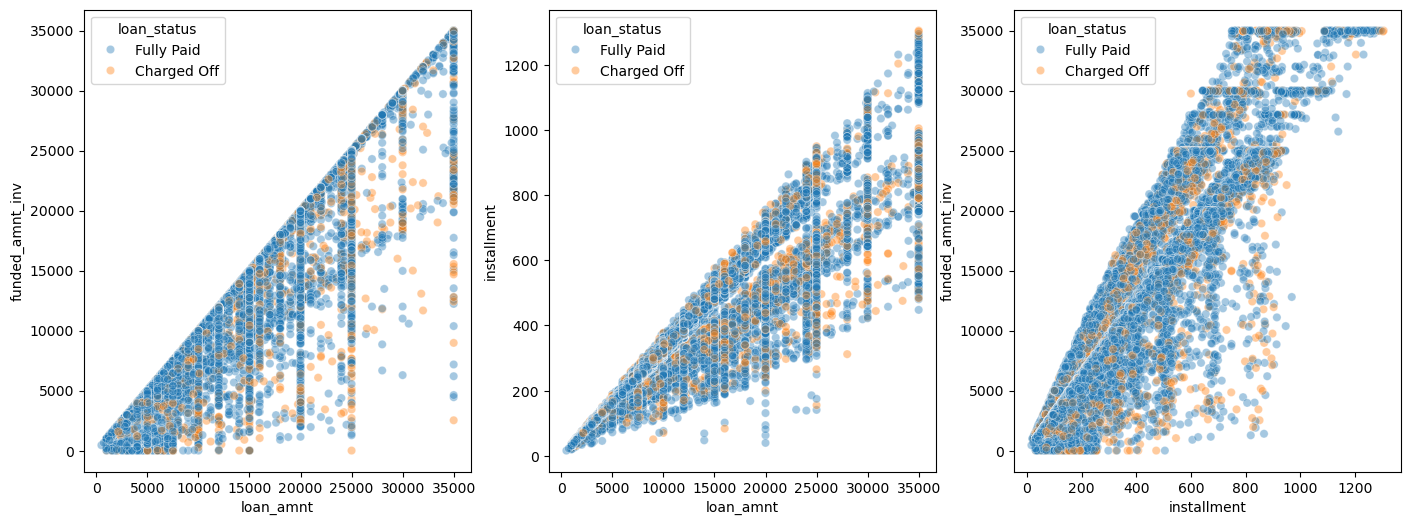

In [482]:
# Investigating 'loan_amnt' and 'funded_amnt_inv' 
plt.figure(figsize=[17,6])
plt.subplot(1,3,1)
sns.scatterplot(data=loan_data, x='loan_amnt', y='funded_amnt_inv', alpha=0.4, hue='loan_status'); 
plt.subplot(1,3,2)
sns.scatterplot(data=loan_data, x='loan_amnt', y='installment', alpha=0.4, hue='loan_status'); 
plt.subplot(1,3,3)
sns.scatterplot(data=loan_data, x='installment', y='funded_amnt_inv', alpha=0.4, hue='loan_status'); 

#### Inference : 
* funded_amnt_inv : The total amount committed by investors for that loan at that point in time. Therefore making it obvious for the installment vs loan amnt chart to show the same trend . 

* Generally , as the loan_amnt increases , so does the installment values . 

##### Checking the relationship between the two target variables : loan_amnt and loan_status 

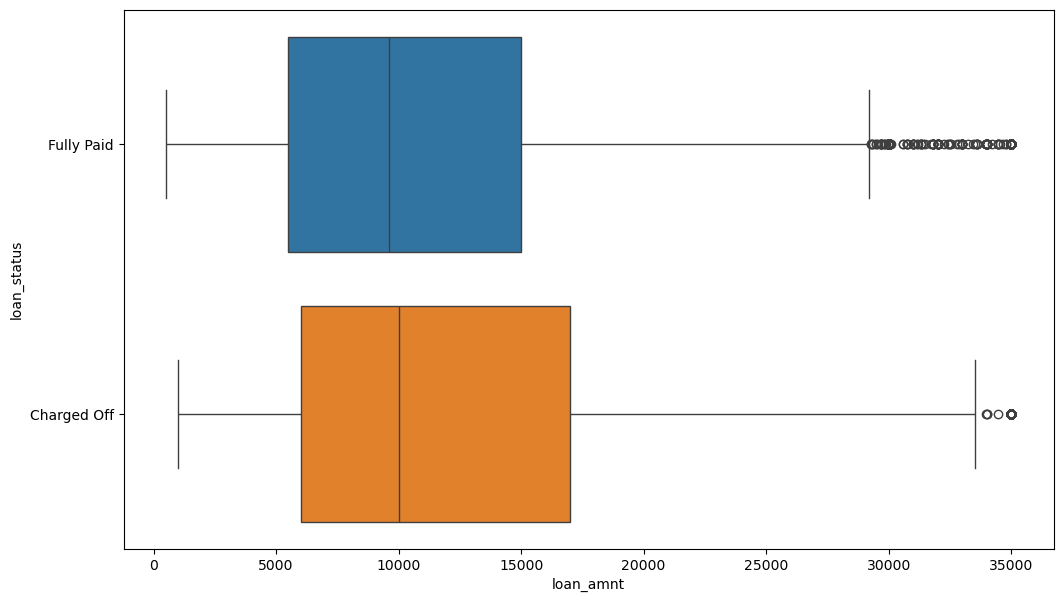

In [483]:
plt.figure(figsize=[12, 7])
# plt.subplot(1,2,1)
sns.boxplot(data=loan_data, x='loan_amnt', y='loan_status',hue='loan_status');

#### Inference 
* The box for "Fully Paid" loans shows a lower median and potentially a wider distribution compared to "Charged Off" loans. 

    This suggests that fully paid loans may encompass a wider range of loan amounts, with some borrowers having larger loans they were able to repay successfully.

* The "Charged Off" boxplot indicates a lower median loan amount compared to "Fully Paid" loans. 

    This could imply that smaller loans are more prone to default, possibly due to reasons like borrowers being less invested in smaller amounts or the lender having less stringent approval requirements for smaller loans.

Summary : Both the 'Fully Paid' and 'Charged Off' charts are extremely similar , and it is not going to be a good indicator of whether a person will be likely to default on their loan or not .

In [484]:
loan_data.head(3)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   

   pub_rec  revol_bal revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648     83.70%          9  5863.155187          5833.84   
1        0       1687      9.40%          4  1008.710000          1008.71   
2        0       2956     98.50%         10  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   

   pub_rec_bankruptcies  loan_status_num  
0                   0.0                1  
1                   0.0                0  
2                   0.0                1

#####  Investigating 'loan_amnt' and 'grades' 

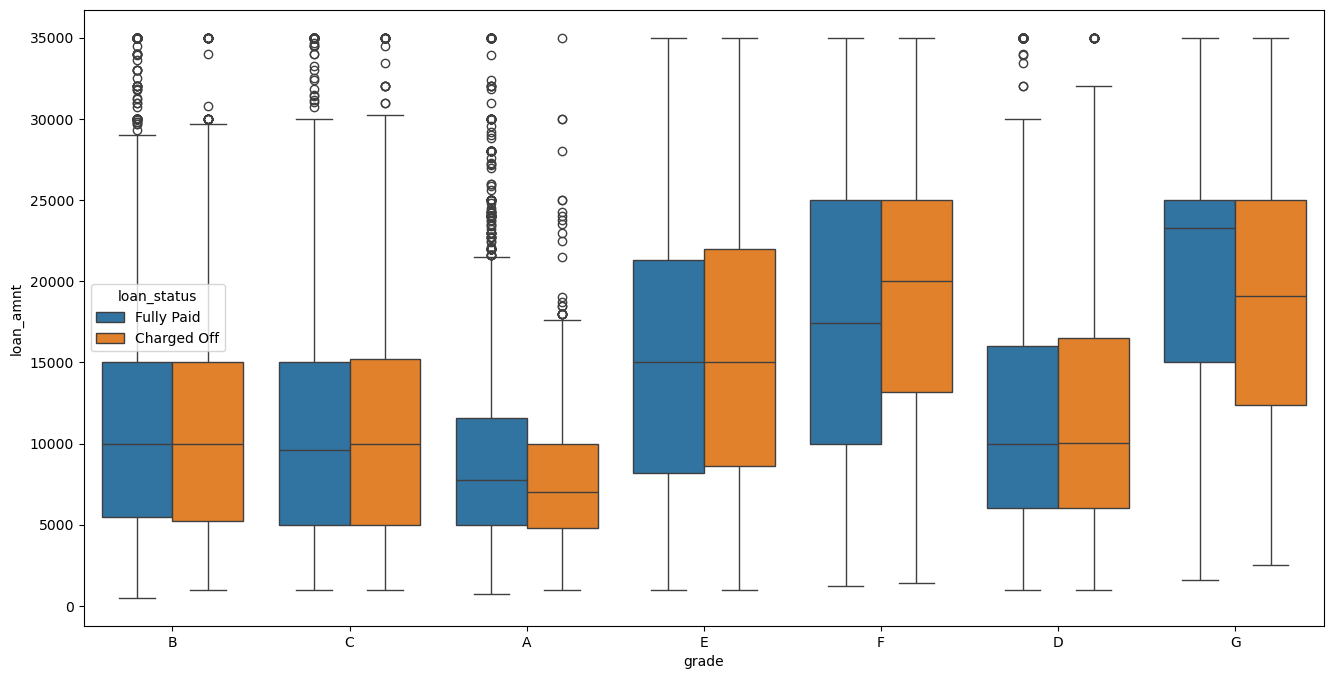

In [485]:
plt.figure(figsize=[16, 8])
sns.boxplot(data=loan_data, y='loan_amnt', x='grade', hue='loan_status'); 

#### Inference 

* The loan amount distribution appears to vary significantly across loan grades . 
* Higher loan amounts were given to grades E , F and G , while A , B , C and D have similar loan amount values .
* There are maximum number of outliers in Grade A . 

Exploring the 'grade' and 'sub_grade' columns . 

In [486]:
display(loan_data['grade'].unique())
display(loan_data['sub_grade'].unique())

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'C2',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

##### Inference 

Subgrade basically contains the values for the actual grade . 

Next, try and see if there is any differentiation between fully paying off your loan or having it be charged off based off your grade . 

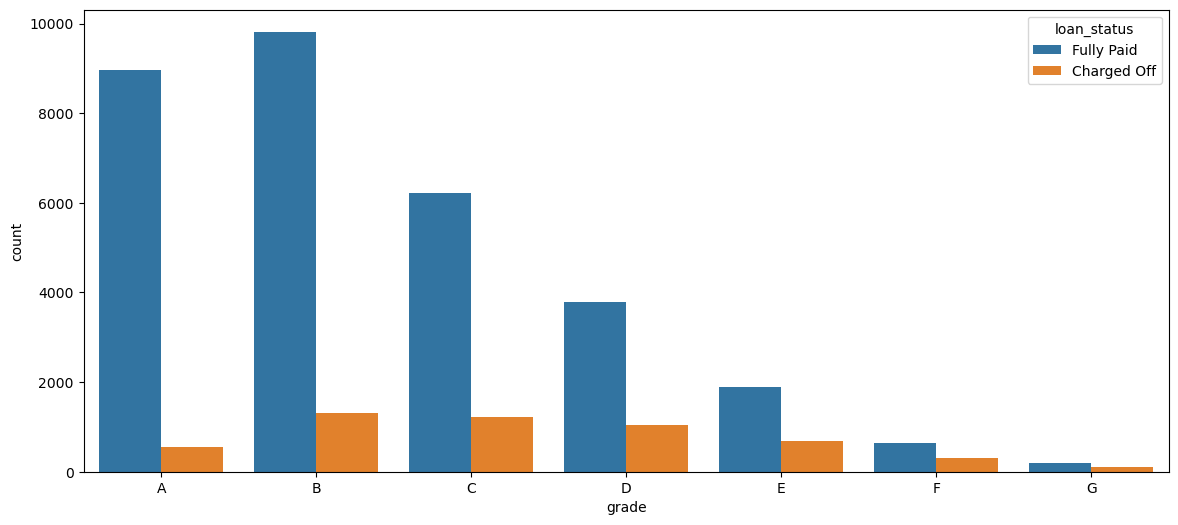

In [487]:
plt.figure(figsize=[14, 6])
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data=loan_data, x='grade', hue='loan_status', order=order);

##### Inference 

Essentially , what it is showing , the 'percentage' of charged off loans are increasing as the grades get higher .

Conclusion drawn can be , best customers are given the grade A , then B , C etc . 

Investigating "F" and "G" subgrades , since they do not get paid back that often . Isolate those and recreate the countplot just for those subgrades . 

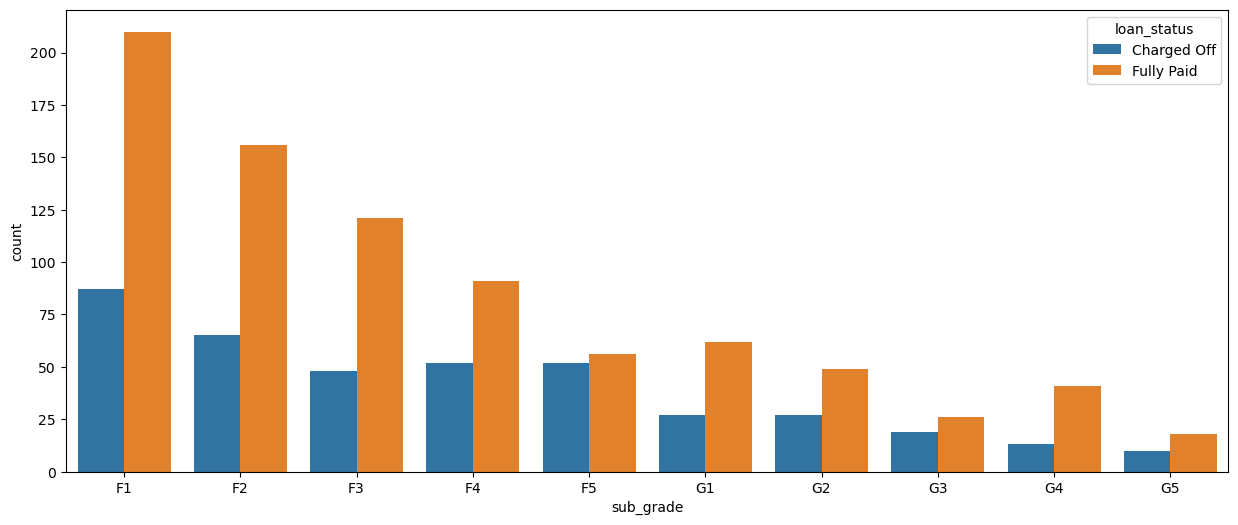

In [488]:
f_and_g = loan_data[(loan_data['grade'] == 'F') | (loan_data['grade'] == 'G')]
# f_and_g
plt.figure(figsize=[15, 6])
subgrade_order_fandg = sorted(f_and_g['sub_grade'].unique())
sns.countplot(data=f_and_g, x='sub_grade', order=subgrade_order_fandg, hue='loan_status'); 

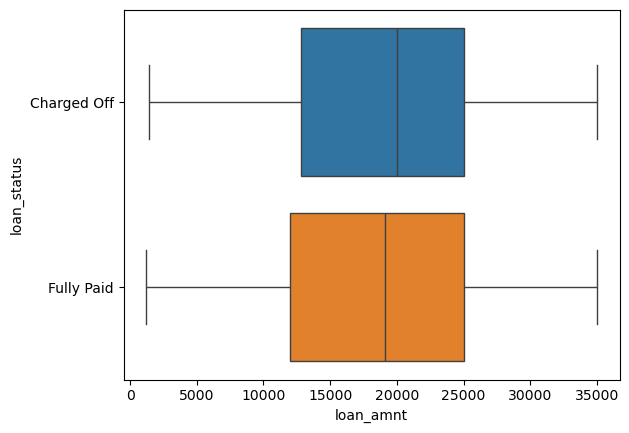

In [489]:
sns.boxplot(data=f_and_g, x='loan_amnt', y='loan_status', hue='loan_status'); 

As can be seen , chances of fully paying off your loan vs charging off on your loan is almost the same , thus indicating how risky the loans are .

##### Analysing employment length with loan status 

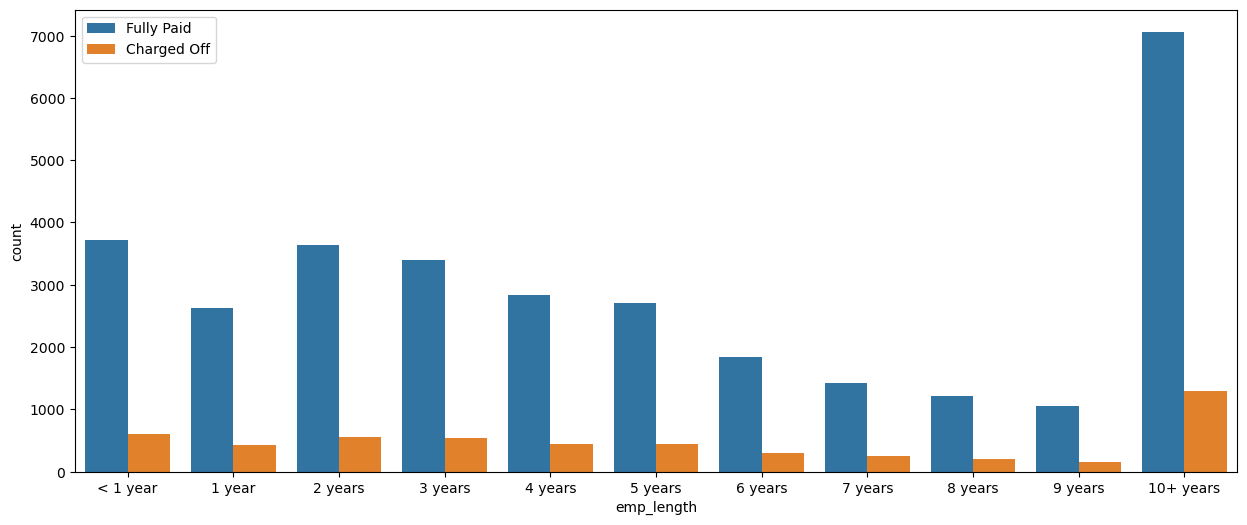

In [490]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

plt.figure(figsize=[15,6])
sns.countplot(data=loan_data, x='emp_length', order=emp_length_order, hue='loan_status'); 
plt.legend(); 

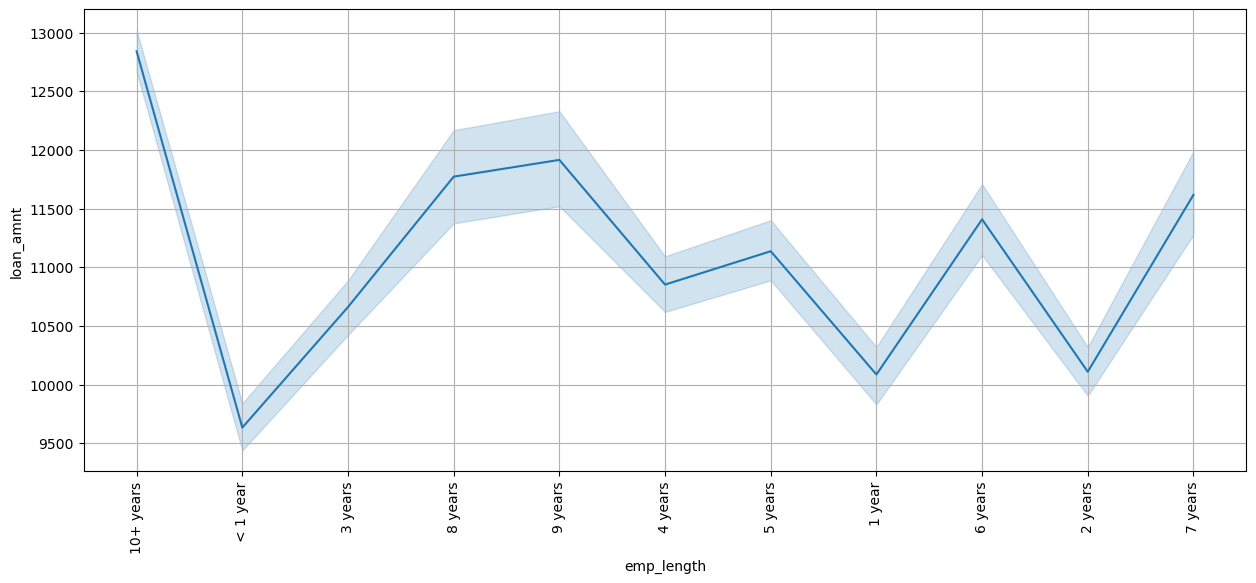

In [491]:
plt.figure(figsize=[15,6])
sns.lineplot(data=loan_data, x='emp_length', y='loan_amnt'); 
plt.grid()
plt.xticks(rotation=90); 

##### Inference 

* Most people who take out loans have been working for 10+ years , which makes sense , as they are more susceptible to both acquire and repay the loan as they usually have accumulated a certain amount of capital upto that point .

* People earlier on in their career avail a lower amount loans , which seems to grow as years keep progressing .

* The count of loan keeps decreasing gradually , indicating people earlier on in their careers might be availing loans to pay off other loans such as education loans .

#### Standardising the Data 

In [492]:
display(loan_data.head(3))
print(loan_data.info())

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   

   pub_rec  revol_bal revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648     83.70%          9  5863.155187          5833.84   
1        0       1687      9.40%          4  1008.710000          1008.71   
2        0       2956     98.50%         10  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   

   pub_rec_bankruptcies  loan_status_num  
0                   0.0                1  
1                   0.0                0  
2                   0.0                1

<class 'pandas.core.frame.DataFrame'>
Index: 36725 entries, 0 to 39623
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36725 non-null  int64  
 1   funded_amnt              36725 non-null  int64  
 2   funded_amnt_inv          36725 non-null  float64
 3   term                     36725 non-null  object 
 4   int_rate                 36725 non-null  object 
 5   installment              36725 non-null  float64
 6   grade                    36725 non-null  object 
 7   sub_grade                36725 non-null  object 
 8   emp_length               36725 non-null  object 
 9   home_ownership           36725 non-null  object 
 10  annual_inc               36725 non-null  float64
 11  verification_status      36725 non-null  object 
 12  issue_d                  36725 non-null  object 
 13  loan_status              36725 non-null  object 
 14  purpose                  36

<b>Upon investigation </b>

['int_rate','emp_length','revol_util'] are the columns that need change :
* "revol_util" column will have continuous values 
* "int_rate" and "emp_length" both need transformation

In [493]:
loan_data[['int_rate','emp_length','revol_util']].head()

int_rate emp_length revol_util
0   10.65%  10+ years     83.70%
1   15.27%   < 1 year      9.40%
2   15.96%  10+ years     98.50%
3   13.49%  10+ years        21%
5    7.90%    3 years     28.30%

In [494]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : float(x.split("%")[0]))
loan_data['emp_length_num'] = loan_data['emp_length'].apply(lambda x : 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x : float(x.split("%")[0]))

In [495]:
loan_data[['int_rate','emp_length_num','revol_util']].head()

int_rate emp_length_num  revol_util
0     10.65             10        83.7
1     15.27              0         9.4
2     15.96             10        98.5
3     13.49             10        21.0
5      7.90              3        28.3

#### Outlier Treatment 

Selecting numerical features from the dataset 

In [496]:
display(loan_data.select_dtypes(exclude='object').head())

loan_data.select_dtypes(exclude='object').describe()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0       5000         5000           4975.0     10.65       162.87     24000.0   
1       2500         2500           2500.0     15.27        59.83     30000.0   
2       2400         2400           2400.0     15.96        84.33     12252.0   
3      10000        10000          10000.0     13.49       339.31     49200.0   
5       5000         5000           5000.0      7.90       156.46     36000.0   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65            0               1         3        0      13648   
1   1.00            0               5         3        0       1687   
2   8.72            0               2         2        0       2956   
3  20.00            0               1        10        0       5598   
5  11.20            0               3         9        0       7963   

   revol_util  total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        83.7          9   5863.155187          5833.84          5000.00   
1         9.4          4   1008.710000          1008.71           456.46   
2        98.5         10   3005.666844          3005.67          2400.00   
3        21.0         37  12231.890000         12231.89         10000.00   
5        28.3         12   5632.210000          5632.21          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   

   last_pymnt_amnt  pub_rec_bankruptcies  loan_status_num  
0           171.62                   0.0                1  
1           119.66                   0.0                0  
2           649.91                   0.0                1  
3           357.48                   0.0                1  
5           161.03                   0.0                1

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  36725.000000  36725.000000     36725.000000  36725.000000   
mean   11153.877468  10884.822328     10445.510279     11.980006   
std     7368.415278   7107.569767      7008.229251      3.701146   
min      500.000000    500.000000         0.000000      5.420000   
25%     5500.000000   5425.000000      5000.000000      8.940000   
50%    10000.000000   9600.000000      9000.000000     11.830000   
75%    15000.000000  15000.000000     14356.026830     14.460000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  36725.000000  3.672500e+04  36725.000000  36725.000000    36725.000000   
mean     325.015602  6.947365e+04     13.337712      0.146004        0.868836   
std      208.852576  6.407095e+04      6.649386      0.491434        1.067604   
min       16.080000  4.000000e+03      0.000000      0.000000        0.000000   
25%      167.730000  4.123500e+04      8.220000      0.000000        0.000000   
50%      280.410000  6.000000e+04     13.430000      0.000000        1.000000   
75%      429.450000  8.300000e+04     18.590000      0.000000        1.000000   
max     1305.190000  6.000000e+06     29.990000     11.000000        8.000000   

           open_acc       pub_rec      revol_bal    revol_util     total_acc  \
count  36725.000000  36725.000000   36725.000000  36725.000000  36725.000000   
mean       9.305895      0.054050   13387.249666     48.992510     22.163812   
std        4.375713      0.235326   15857.681365     28.312211     11.406991   
min        2.000000      0.000000       0.000000      0.000000      2.000000   
25%        6.000000      0.000000    3735.000000     25.600000     14.000000   
50%        9.000000      0.000000    8883.000000     49.500000     20.000000   
75%       12.000000      0.000000   17040.000000     72.500000     29.000000   
max       44.000000      4.000000  149588.000000     99.900000     90.000000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  36725.000000     36725.000000     36725.000000   36725.000000   
mean   12020.919525     11545.616178      9767.379203    2154.796903   
std     8849.661919      8705.560499      7034.393197    2411.987791   
min       33.730000         0.000000         0.000000       6.220000   
25%     5590.586144      5292.960000      4641.430000     660.780000   
50%     9833.880000      9376.390000      8000.000000    1328.680000   
75%    16322.907190     15638.330000     13500.000000    2720.740000   
max    58563.679930     58563.680000     35000.020000   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        36725.000000  36725.000000             36725.000000   
mean             1.341245     97.402261                12.499825   
std              7.205249    700.534611               150.315606   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt  pub_rec_bankruptcies  loan_status_num  
count     36725.000000          36725.000000     36725.000000  
mean       2800.682096              0.041688         0.858380  
std        4538.188113              0.200558         0.348665  
min           0.010000              0.000000         0.000000  
25%         223.600000              0.000000         1.000000  
50%         592.400000              0.000000         1.000000  
75%        3554.940000              0.000000         1.000000  
max       36115.200000              2.000000         1.000000

##### Investigating annual_inc

In [497]:
loan_data['annual_inc'].describe()

count    3.672500e+04
mean     6.947365e+04
std      6.407095e+04
min      4.000000e+03
25%      4.123500e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

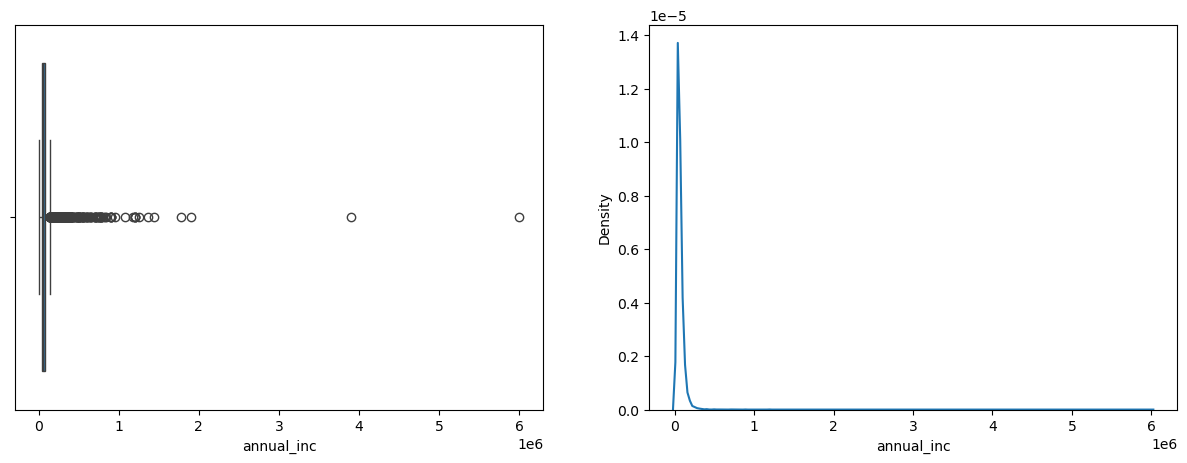

In [498]:
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.boxplot(data=loan_data, x='annual_inc')
plt.subplot(1,2,2)
sns.kdeplot(data=loan_data['annual_inc']); 

The values after 95 percentile seems disconnected from the general distribution , therefore considering it a threshold for removing outliers . 

In [499]:
print(f"Shape of the dataset : {loan_data.shape}")
loan_data = loan_data[loan_data['annual_inc'] <= loan_data['annual_inc'].quantile(0.95)]
print(f"Shape of the dataset after : {loan_data.shape}")

Shape of the dataset : (36725, 40)
Shape of the dataset after : (34897, 40)


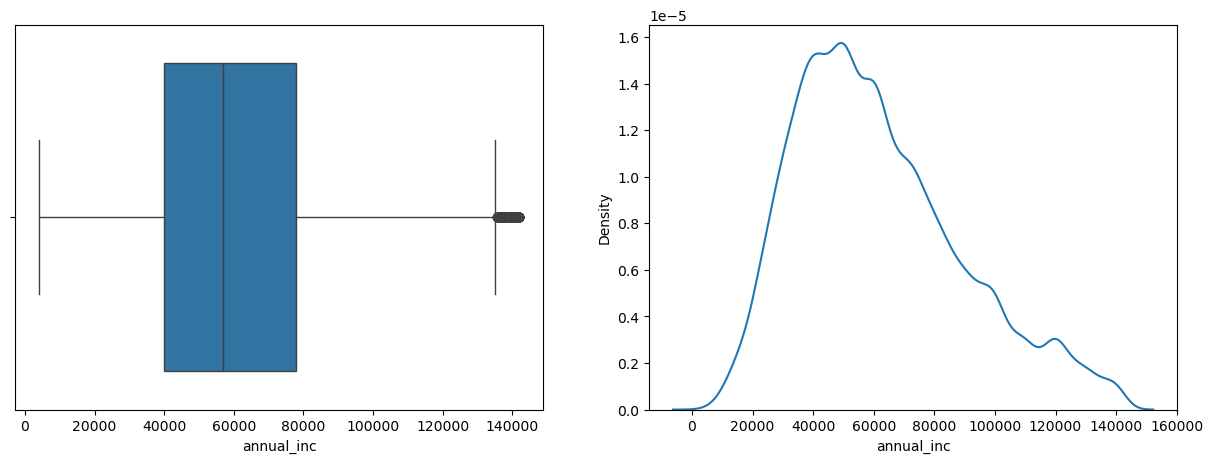

In [500]:
# Rechecking plots 

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.boxplot(data=loan_data, x='annual_inc')
plt.subplot(1,2,2)
sns.kdeplot(data=loan_data['annual_inc']); 

In [501]:
loan_data.corr(numeric_only=True)['loan_amnt'].sort_values(ascending=False)

loan_amnt                  1.000000
funded_amnt                0.981635
funded_amnt_inv            0.951876
installment                0.930229
total_pymnt                0.878460
total_pymnt_inv            0.854528
total_rec_prncp            0.840624
total_rec_int              0.727046
last_pymnt_amnt            0.470805
annual_inc                 0.399621
revol_bal                  0.313349
int_rate                   0.290175
total_acc                  0.237470
open_acc                   0.162633
recoveries                 0.145306
dti                        0.088814
collection_recovery_fee    0.075271
revol_util                 0.068563
total_rec_late_fee         0.043388
inq_last_6mths            -0.000033
pub_rec_bankruptcies      -0.024798
pub_rec                   -0.040466
delinq_2yrs               -0.040486
loan_status_num           -0.069875
Name: loan_amnt, dtype: float64

In [502]:
display(loan_data[loan_data.corr(numeric_only=True)['loan_amnt'].sort_values(ascending=False)[1:9].index.to_list()].head())

display(loan_data[loan_data.corr(numeric_only=True)['loan_amnt'].sort_values(ascending=False)[1:9].index.to_list()].describe())

funded_amnt  funded_amnt_inv  installment   total_pymnt  total_pymnt_inv  \
0         5000           4975.0       162.87   5863.155187          5833.84   
1         2500           2500.0        59.83   1008.710000          1008.71   
2         2400           2400.0        84.33   3005.666844          3005.67   
3        10000          10000.0       339.31  12231.890000         12231.89   
5         5000           5000.0       156.46   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  last_pymnt_amnt  
0          5000.00         863.16           171.62  
1           456.46         435.17           119.66  
2          2400.00         605.67           649.91  
3         10000.00        2214.92           357.48  
5          5000.00         632.21           161.03

funded_amnt  funded_amnt_inv   installment   total_pymnt  \
count  34897.000000     34897.000000  34897.000000  34897.000000   
mean   10530.193140     10107.566100    314.245437  11588.913986   
std     6814.971499      6717.094195    199.316538   8446.821315   
min      500.000000         0.000000     16.080000     33.730000   
25%     5000.000000      5000.000000    164.860000   5494.866882   
50%     9175.000000      8750.000000    273.100000   9516.768229   
75%    14400.000000     13925.000000    411.670000  15655.206290   
max    35000.000000     35000.000000   1305.190000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  last_pymnt_amnt  
count     34897.000000     34897.000000   34897.000000     34897.000000  
mean      11133.725749      9425.148040    2068.261644      2681.014073  
std        8308.398833      6723.365556    2295.817304      4347.473726  
min           0.000000         0.000000       6.220000         0.010000  
25%        5174.370000      4500.000000     644.570000       218.040000  
50%        9089.990000      8000.000000    1283.350000       563.550000  
75%       15055.120000     12800.000000    2605.770000      3413.380000  
max       58563.680000     35000.020000   23563.680000     36115.200000

Similarly , performing the same outlier check for : 
- 'funded_amnt',
- 'funded_amnt_inv',
- 'installment',
- 'total_pymnt',
- 'total_pymnt_inv',
- 'total_rec_prncp',
- 'total_rec_int',
- 'last_pymnt_amnt'

<b> Why these numerical values and not the others ? </b>    

    These are the top correlating values with the loan_amnt column 

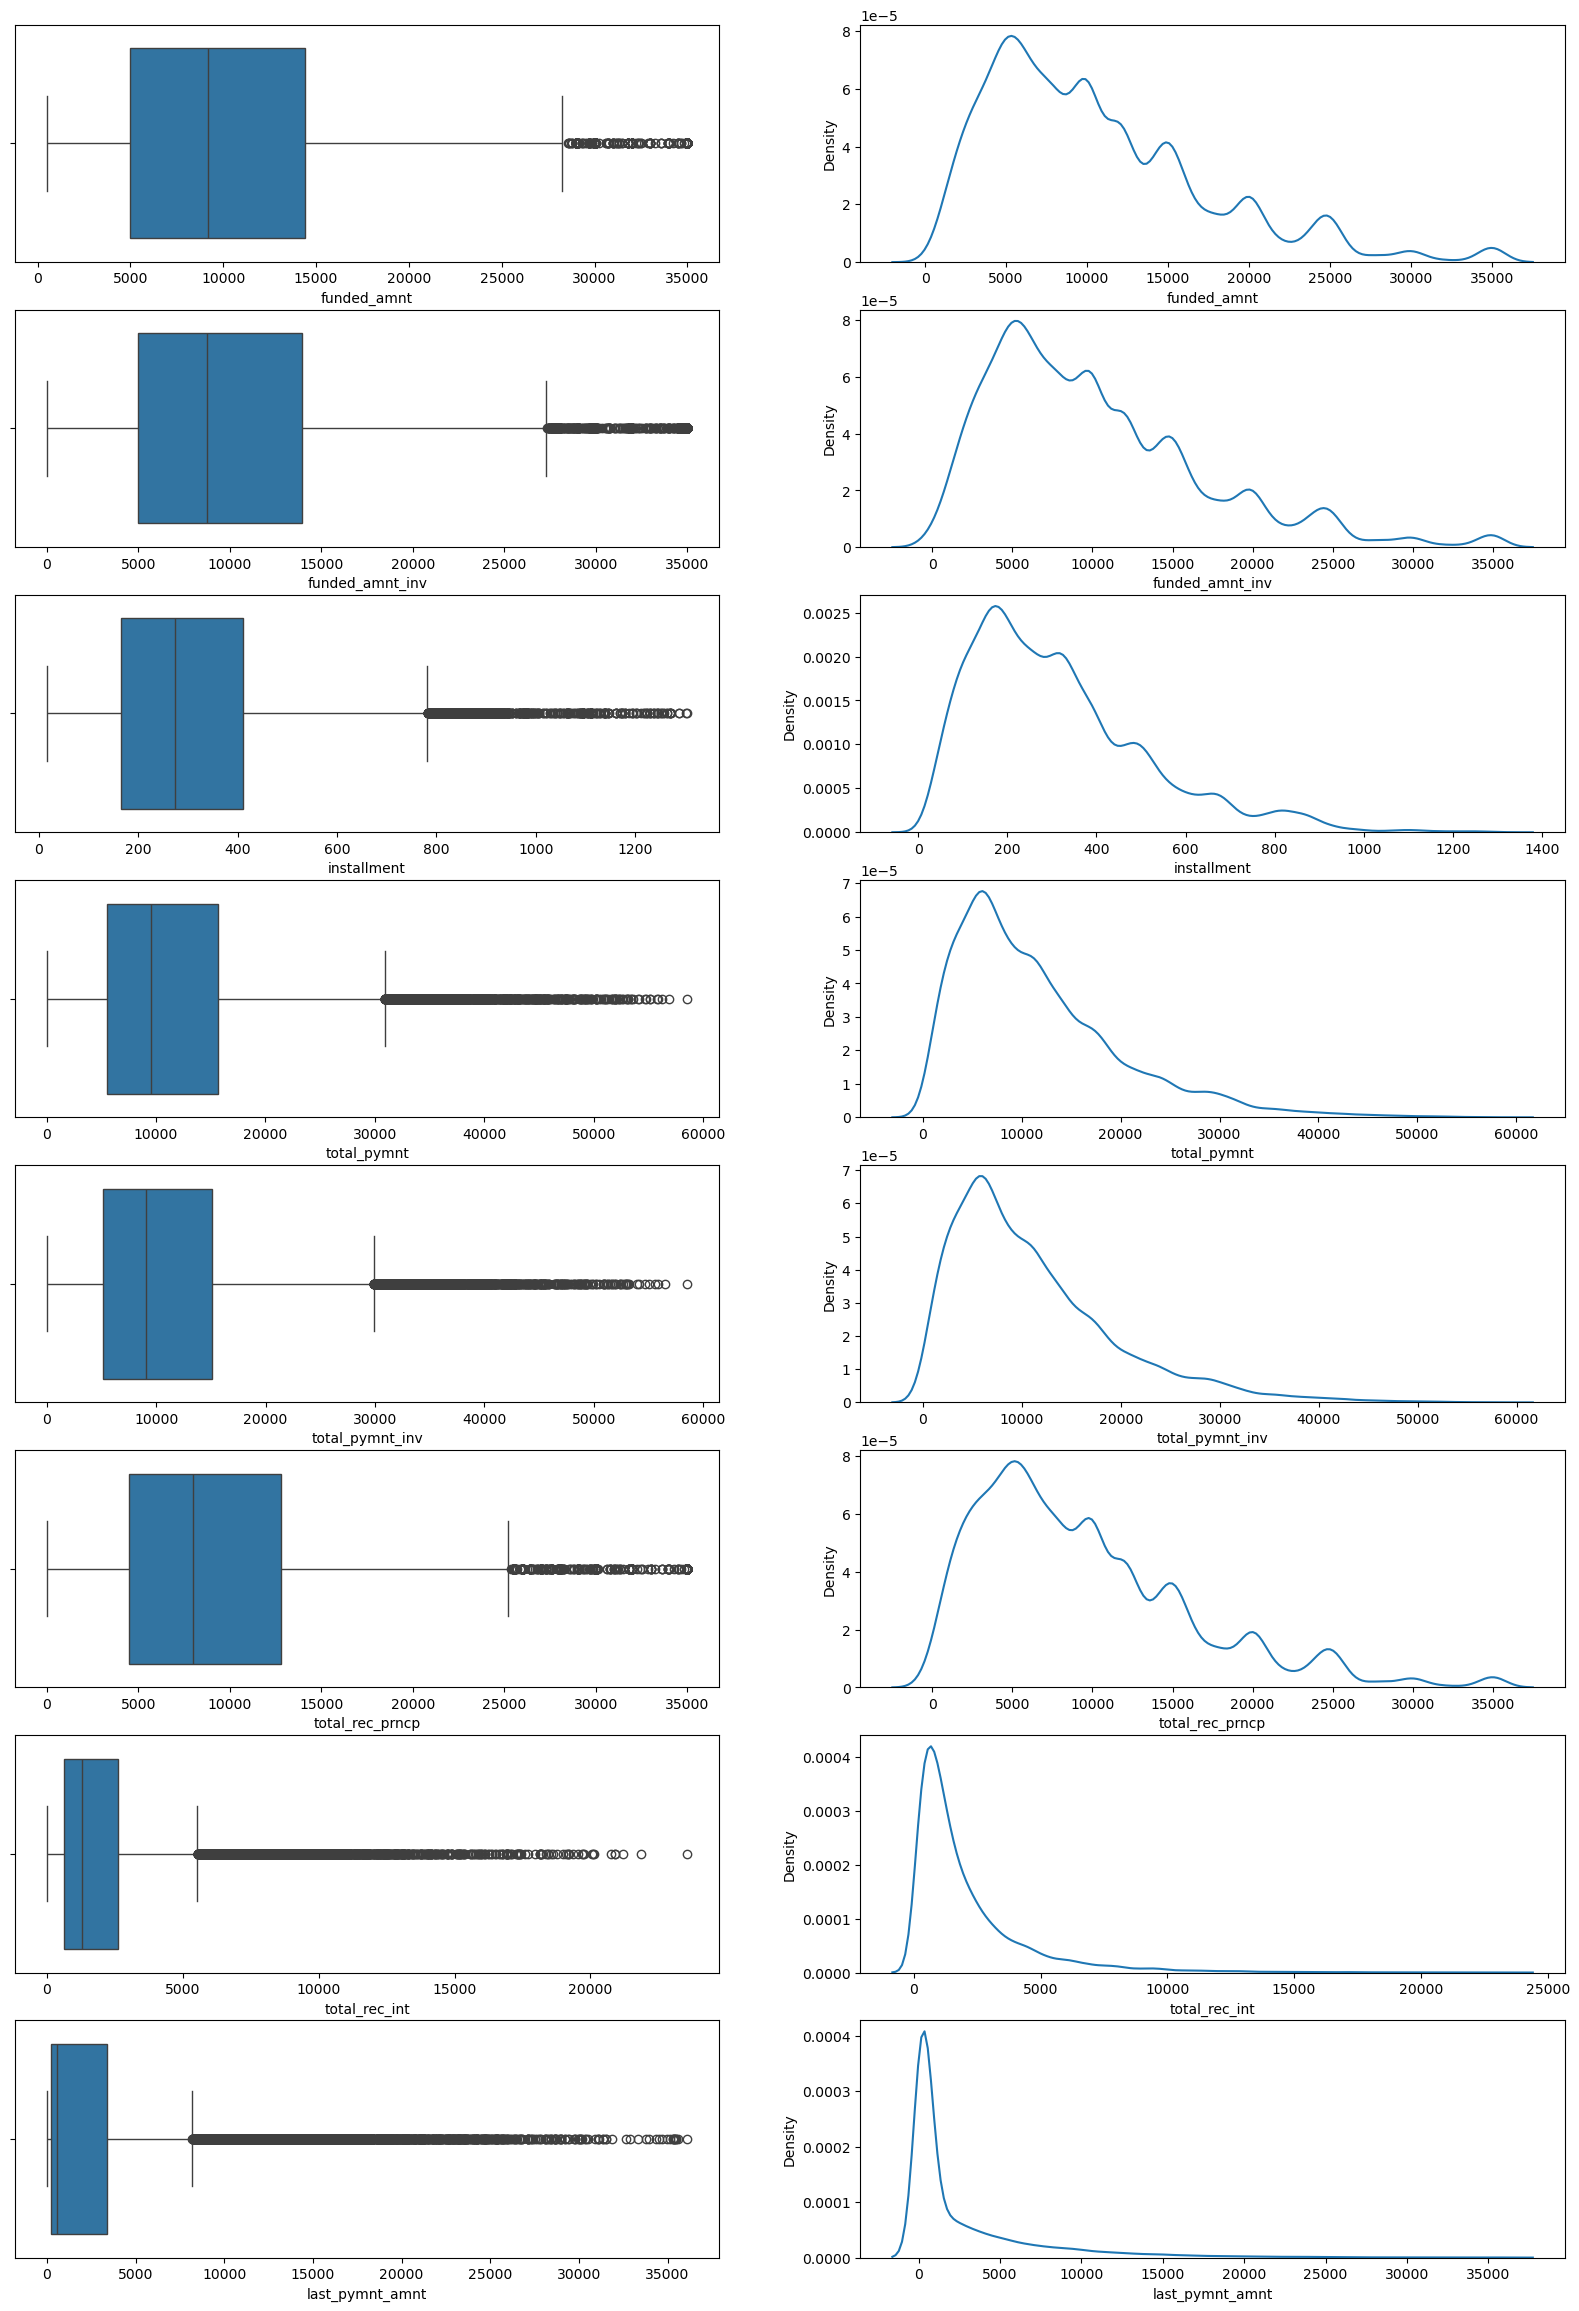

In [503]:
plt.figure(figsize=[20, 29])


plt.subplot(8,2,1)
sns.boxplot(data=loan_data, x='funded_amnt')
plt.subplot(8,2,2)
sns.kdeplot(data=loan_data['funded_amnt']); 


plt.subplot(8,2,3)
sns.boxplot(data=loan_data, x='funded_amnt_inv')
plt.subplot(8,2,4)
sns.kdeplot(data=loan_data['funded_amnt_inv']); 


plt.subplot(8,2,5)
sns.boxplot(data=loan_data, x='installment')
plt.subplot(8,2,6)
sns.kdeplot(data=loan_data['installment']); 


plt.subplot(8,2,7)
sns.boxplot(data=loan_data, x='total_pymnt')
plt.subplot(8,2,8)
sns.kdeplot(data=loan_data['total_pymnt']); 


plt.subplot(8,2,9)
sns.boxplot(data=loan_data, x='total_pymnt_inv')
plt.subplot(8,2,10)
sns.kdeplot(data=loan_data['total_pymnt_inv']); 


plt.subplot(8,2,11)
sns.boxplot(data=loan_data, x='total_rec_prncp')
plt.subplot(8,2,12)
sns.kdeplot(data=loan_data['total_rec_prncp']); 


plt.subplot(8,2,13)
sns.boxplot(data=loan_data, x='total_rec_int')
plt.subplot(8,2,14)
sns.kdeplot(data=loan_data['total_rec_int']); 

plt.subplot(8,2,15)
sns.boxplot(data=loan_data, x='last_pymnt_amnt')
plt.subplot(8,2,16)
sns.kdeplot(data=loan_data['last_pymnt_amnt']); 

##### Inference 

Almost all numerical values have quite some values outside the interquartile range , thus skewing the distribution . 

In [504]:
print(loan_data['funded_amnt'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['funded_amnt_inv'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['total_pymnt_inv'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['total_pymnt'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['installment'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['total_rec_prncp'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['total_rec_int'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))
print()
print(loan_data['last_pymnt_amnt'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95]))


count    34897.000000
mean     10530.193140
std       6814.971499
min        500.000000
25%       5000.000000
50%       9175.000000
75%      14400.000000
90%      20000.000000
95%      25000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

count    34897.000000
mean     10107.566100
std       6717.094195
min          0.000000
25%       5000.000000
50%       8750.000000
75%      13925.000000
90%      19850.000000
95%      23975.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

count    34897.000000
mean     11133.725749
std       8308.398833
min          0.000000
25%       5174.370000
50%       9089.990000
75%      15055.120000
90%      22593.112000
95%      28118.312000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

count    34897.000000
mean     11588.913986
std       8446.821315
min         33.730000
25%       5494.866882
50%       9516.768229
75%      15655.206290
90%      23384.603740
95%      28786.271130
max      58563.679930
Name: t

##### Inference 

The graphs and the description above , indicate the presence of outliers ( checking the difference between the 95th percentile and the max value )

Removing the outliers to some extent : 

In [505]:
print(f"Shape of the dataset : {loan_data.shape}")

loan_data = loan_data[loan_data['funded_amnt'] <= loan_data['funded_amnt'].quantile(0.95)]
loan_data = loan_data[loan_data['funded_amnt_inv'] <= loan_data['funded_amnt_inv'].quantile(0.95)]
loan_data = loan_data[loan_data['total_pymnt_inv'] <= loan_data['total_pymnt_inv'].quantile(0.95)]
loan_data = loan_data[loan_data['total_pymnt'] <= loan_data['total_pymnt'].quantile(0.95)]
loan_data = loan_data[loan_data['installment'] <= loan_data['installment'].quantile(0.95)]
loan_data = loan_data[loan_data['total_rec_prncp'] <= loan_data['total_rec_prncp'].quantile(0.95)]
loan_data = loan_data[loan_data['total_rec_int'] <= loan_data['total_rec_int'].quantile(0.95)]
loan_data = loan_data[loan_data['last_pymnt_amnt'] <= loan_data['last_pymnt_amnt'].quantile(0.95)]

Shape of the dataset : (34897, 40)


In [506]:
# print(f"Shape of the dataset : {loan_data.shape}")


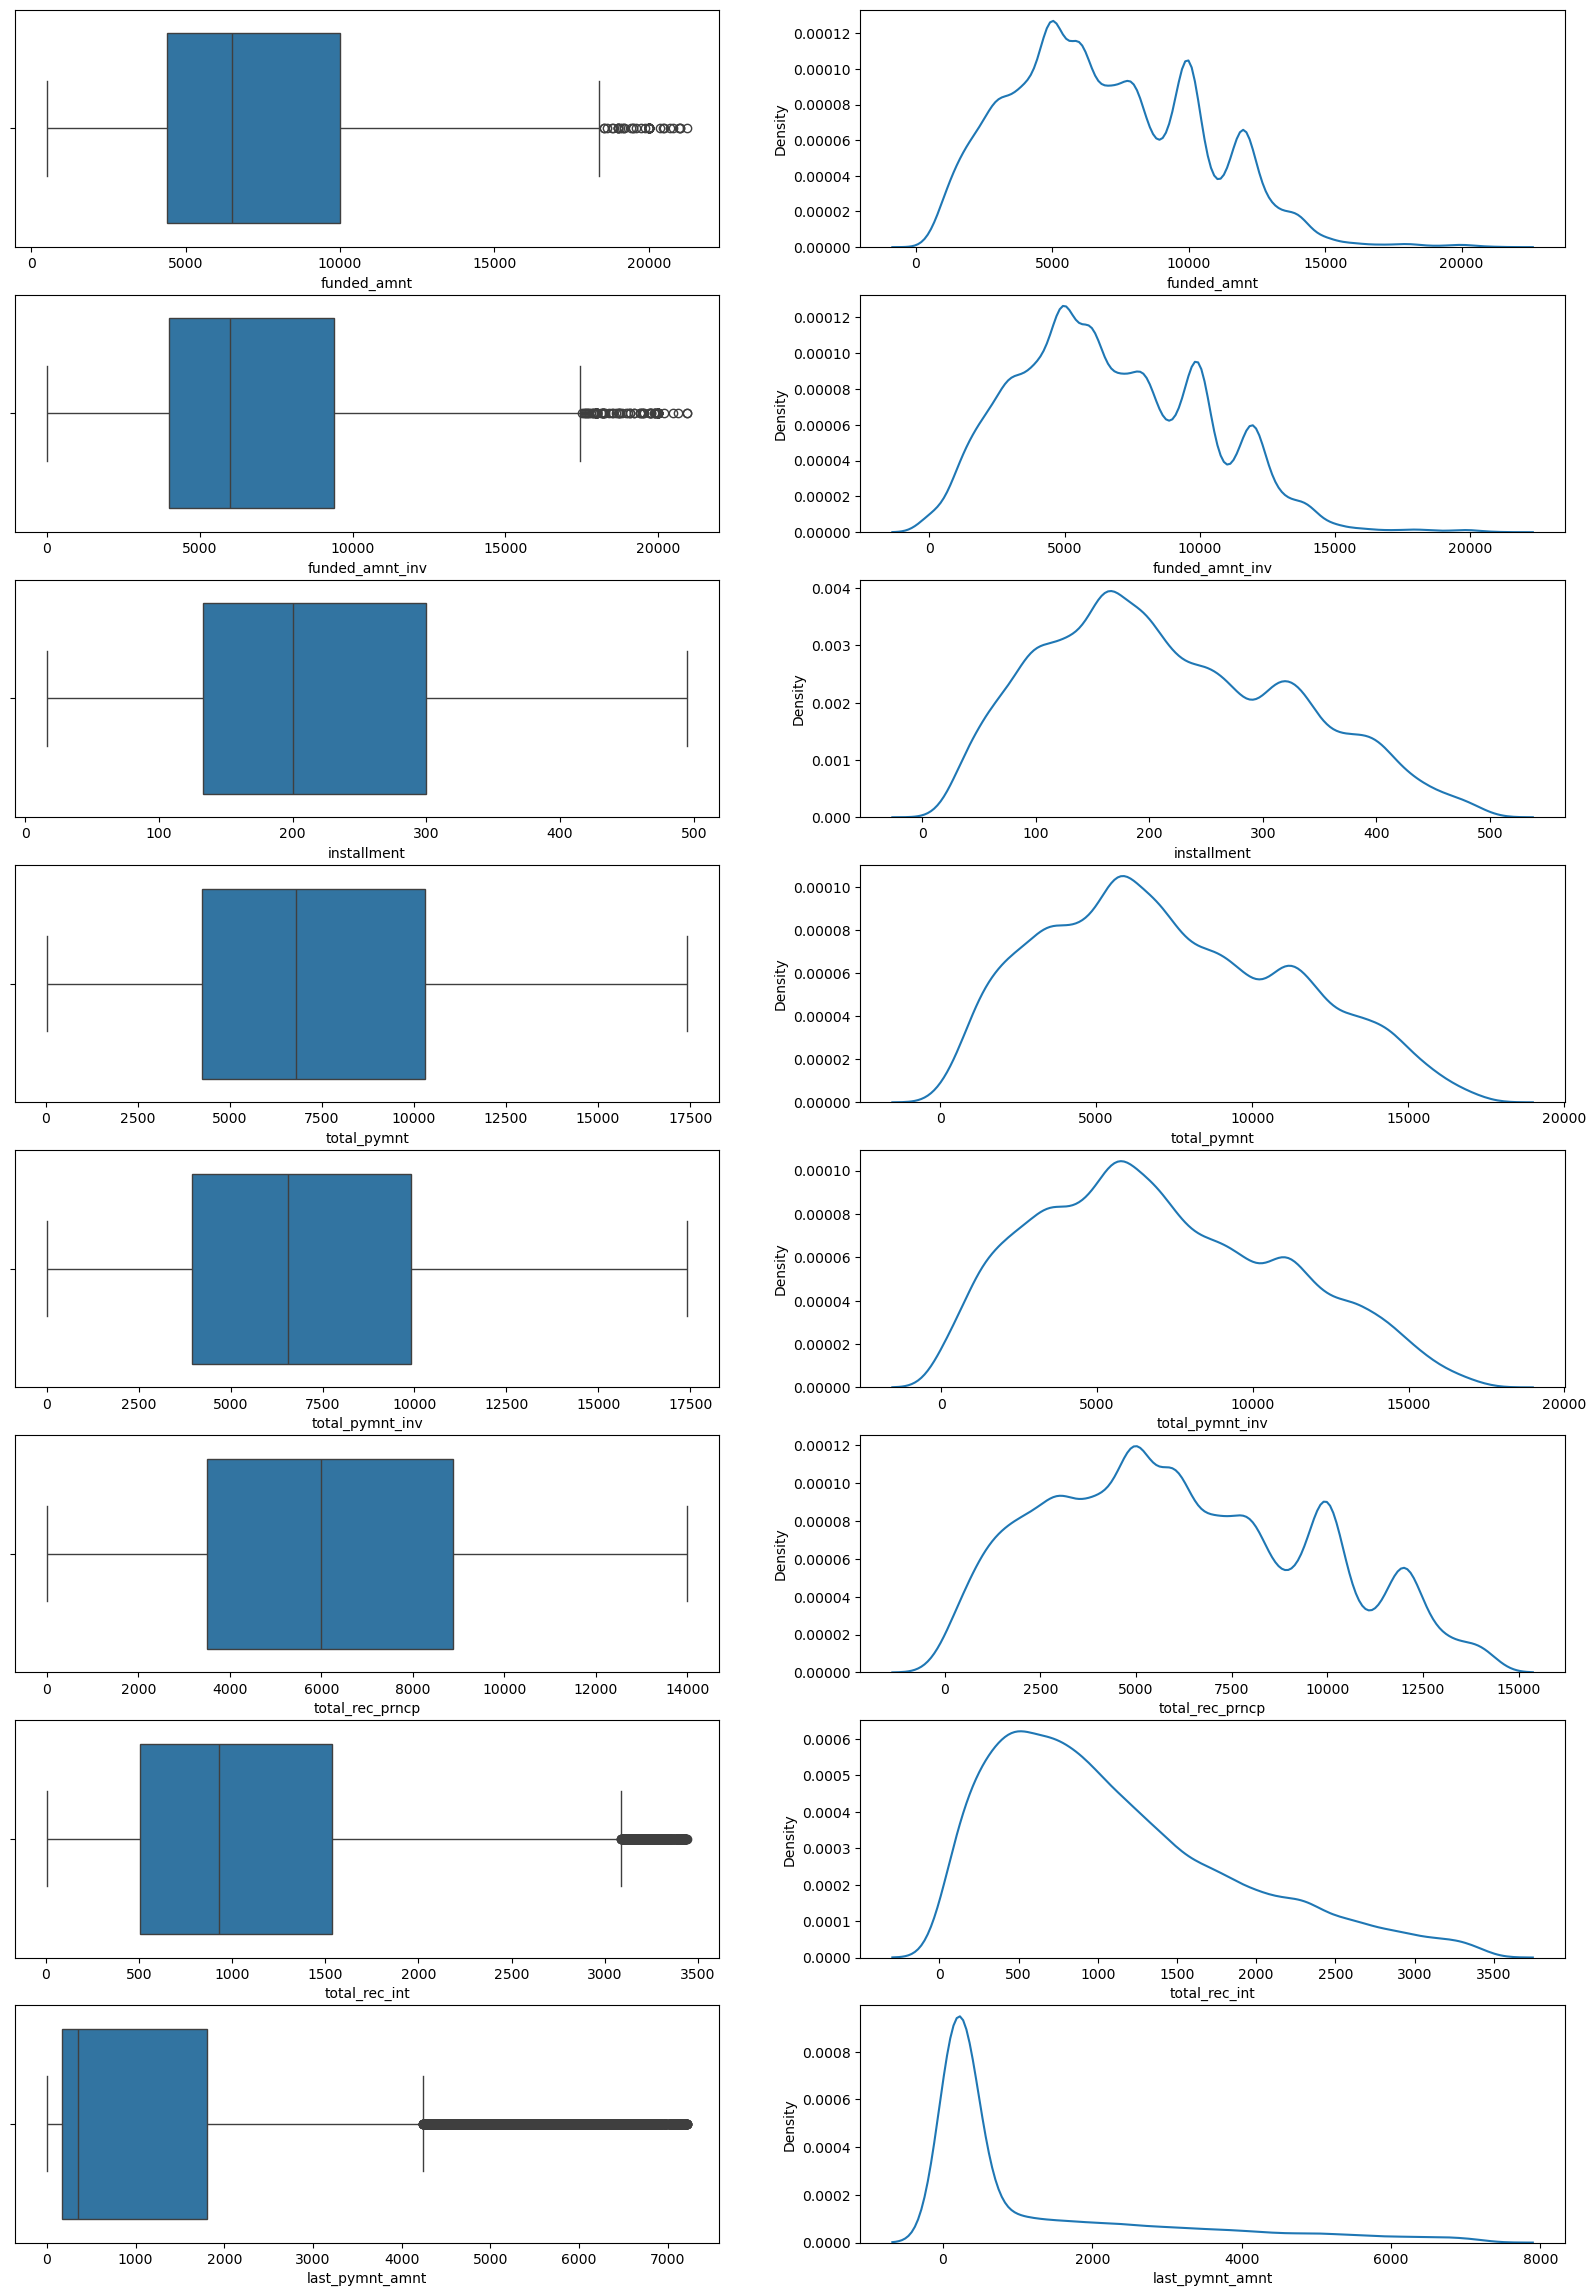

In [507]:
plt.figure(figsize=[20, 29])


plt.subplot(8,2,1)
sns.boxplot(data=loan_data, x='funded_amnt')
plt.subplot(8,2,2)
sns.kdeplot(data=loan_data['funded_amnt']); 


plt.subplot(8,2,3)
sns.boxplot(data=loan_data, x='funded_amnt_inv')
plt.subplot(8,2,4)
sns.kdeplot(data=loan_data['funded_amnt_inv']); 


plt.subplot(8,2,5)
sns.boxplot(data=loan_data, x='installment')
plt.subplot(8,2,6)
sns.kdeplot(data=loan_data['installment']); 


plt.subplot(8,2,7)
sns.boxplot(data=loan_data, x='total_pymnt')
plt.subplot(8,2,8)
sns.kdeplot(data=loan_data['total_pymnt']); 


plt.subplot(8,2,9)
sns.boxplot(data=loan_data, x='total_pymnt_inv')
plt.subplot(8,2,10)
sns.kdeplot(data=loan_data['total_pymnt_inv']); 


plt.subplot(8,2,11)
sns.boxplot(data=loan_data, x='total_rec_prncp')
plt.subplot(8,2,12)
sns.kdeplot(data=loan_data['total_rec_prncp']); 


plt.subplot(8,2,13)
sns.boxplot(data=loan_data, x='total_rec_int')
plt.subplot(8,2,14)
sns.kdeplot(data=loan_data['total_rec_int']); 

plt.subplot(8,2,15)
sns.boxplot(data=loan_data, x='last_pymnt_amnt')
plt.subplot(8,2,16)
sns.kdeplot(data=loan_data['last_pymnt_amnt']); 

#### Inference 

Although understandably , the loss of data by following the outlier removal method above is NOT APPROPRIATE , the aim of this project is to form a generalized idea behind the defaulting on loans .

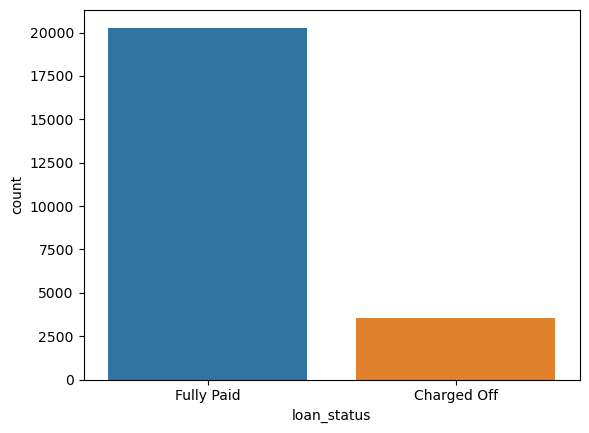

In [508]:
# Checking the target variable distribution 

sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

Distribution does not have been affected much as they still share the same proportion .

#### Working with Categorical data 

##### Analysing "home_ownership" 

"home_ownership" : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. 

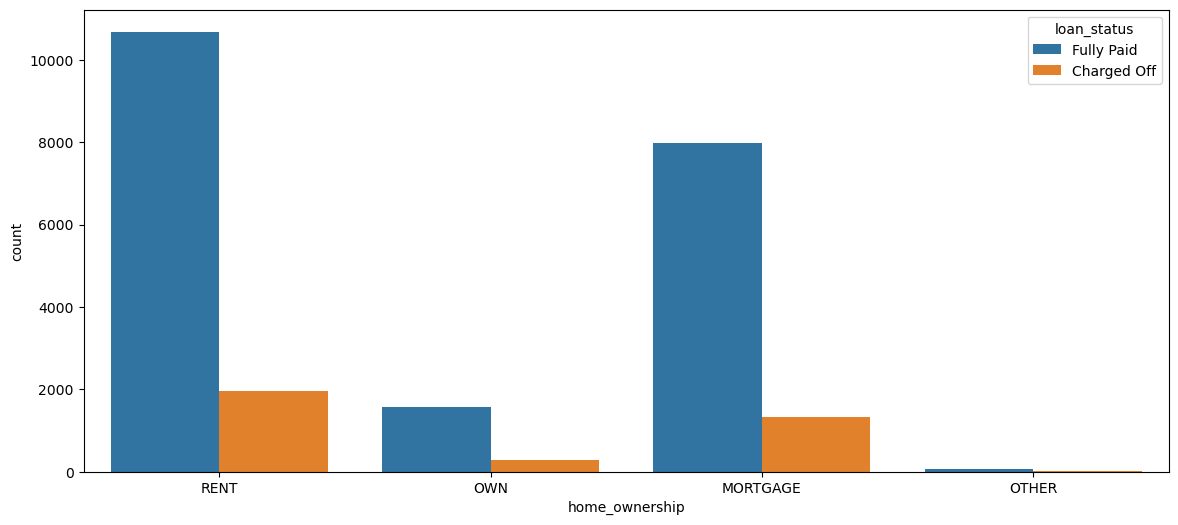

In [509]:
plt.figure(figsize=[14,6])
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status'); 

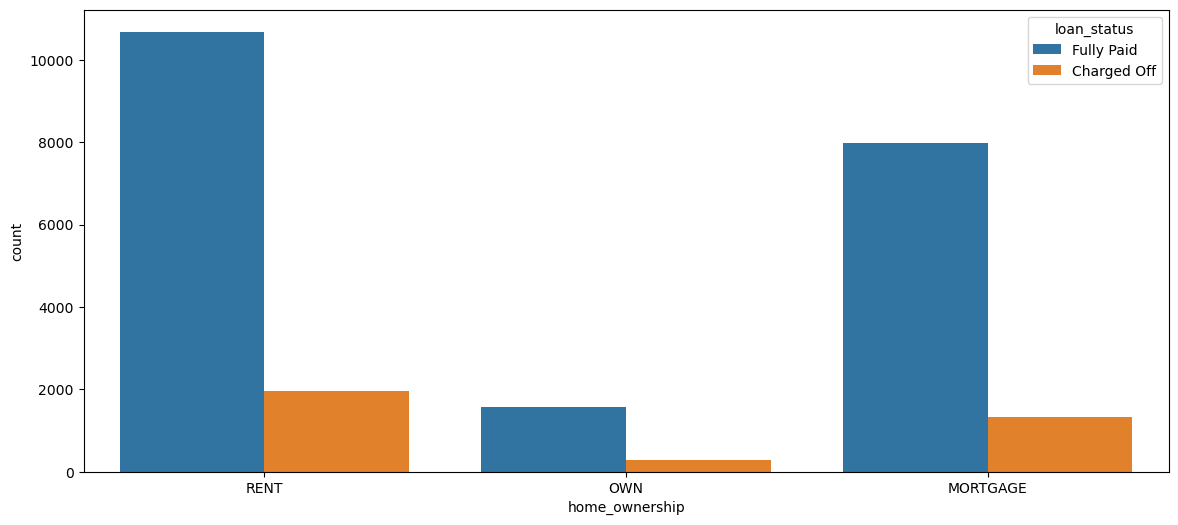

In [510]:
loan_data = loan_data[loan_data['home_ownership'] != 'OTHER']
plt.figure(figsize=[14,6])
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status'); 

##### Inference 

* Homeownership often requires a stable income and good creditworthiness, which might also make borrowers more likely to repay loans. 

* Renters, on the other hand, might have less financial stability or a lower credit score, potentially increasing their default risk.

* Homeowners have a stake in their property, and keeping up with mortgage payments helps them avoid foreclosure. This incentive to repay might be less prominent for renters.

In summary , not a lot can be said , as the discrepancy between all three home_ownership methods is about the same .

#### Analysing "purpose" 

"purpose" description : A category provided by the borrower for the loan request. 

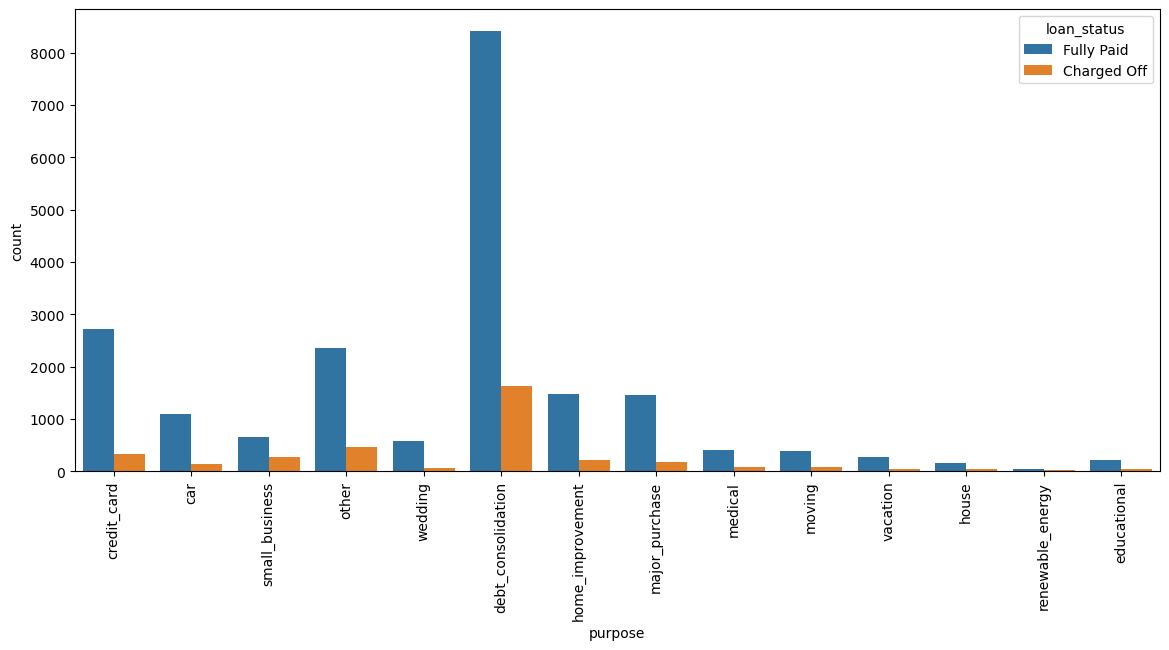

In [511]:
plt.figure(figsize=[14,6])
sns.countplot(data=loan_data, x='purpose', hue='loan_status'); 
plt.xticks(rotation=90); 

##### Inference 

* Although no distince seperation can be drawn , 'debt_consolidation' seems like the leading factor behind taking out a loan i.e. paying off existing loans by availing another loan . 

    - <b> We can further draw insights on defaulters by looking at the number of loans they have availed prior to availing this loan .</b> 
* Another purpose is taking out a loan for 'credit_card' payments . 

#### Dropping features with date values 

Since we wont be making any analysis on columns with date values (except 'issue_d' (issuing date))

In [512]:
loan_data.select_dtypes(include='object').head(3)

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months     B        B2  10+ years           RENT            Verified   
1   60 months     C        C4   < 1 year           RENT     Source Verified   
2   36 months     C        C5  10+ years           RENT        Not Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   

  addr_state earliest_cr_line last_pymnt_d last_credit_pull_d emp_length_num  
0         AZ           Jan-85       Jan-15             May-16             10  
1         GA           Apr-99       Apr-13             Sep-13              0  
2         IL           Nov-01       Jun-14             May-16             10

In [513]:
loan_data.drop(columns=['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [514]:
loan_data.select_dtypes(include='object').head(3)

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months     B        B2  10+ years           RENT            Verified   
1   60 months     C        C4   < 1 year           RENT     Source Verified   
2   36 months     C        C5  10+ years           RENT        Not Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   

  addr_state emp_length_num  
0         AZ             10  
1         GA              0  
2         IL             10

##### Analysing 'verification_status' 

Description : Indicates if income was verified by LC, not verified, or if the income source was verified

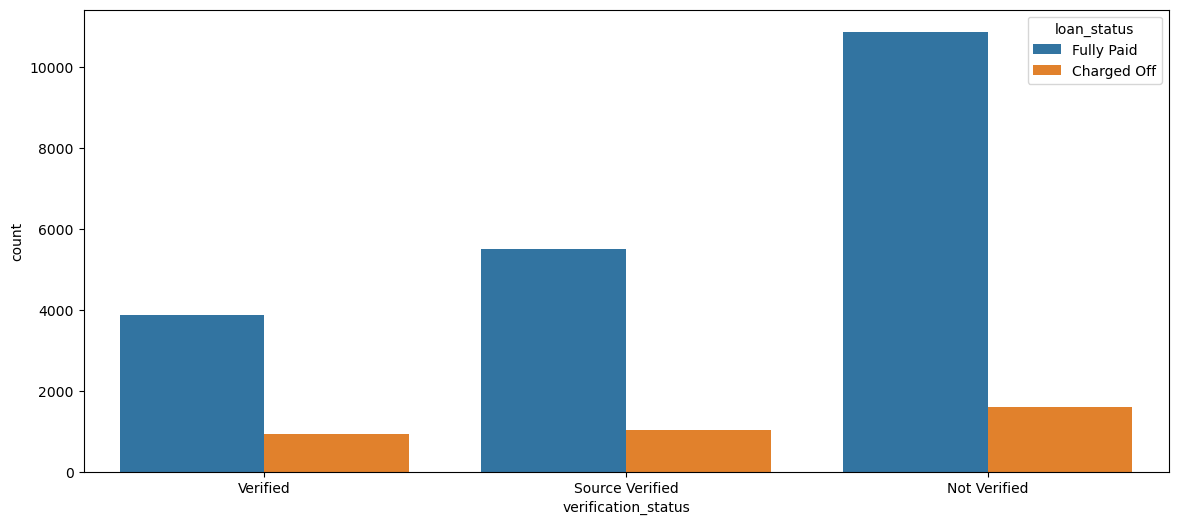

In [515]:
plt.figure(figsize=[14,6])

sns.countplot(data=loan_data , x='verification_status', hue='loan_status'); 

##### Inference : 

* No distince seperation between defaulters w.r.t the applicant being vetted by the Bank or not .

##### Analysing 'term' 

Description : The number of payments on the loan. Values are in months and can be either 36 or 60.

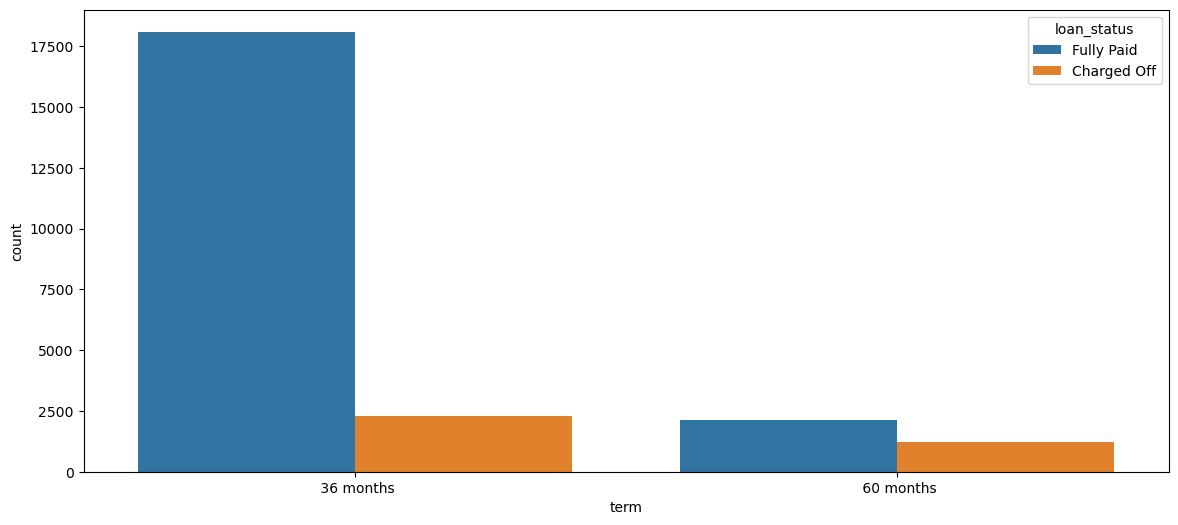

In [516]:
plt.figure(figsize=[14,6])

sns.countplot(data=loan_data , x='term', hue='loan_status'); 

##### Inference 

People tend to default more on the '60 month' payment plan . 

Possible reasons : 
* Financial Instability : Over a longer period , individuals are more likely to encounter financial hardships such as job loss , medican emergencies etc . which can impact their ability to make constant payments . 

* Interest Accumulation : Longer-term loans accrue more interest . 

* Borrower overconifdence and Economic Changes 

##### Analysing 'zip_code' and 'addr_state'

Description : 
- zip_code : "The first 3 numbers of the zip code provided by the borrower in the loan application."
- addr_state : "The state provided by the borrower in the loan application"

What can be done : Make a chart using plotly to find the states with the highest loan applications like below :

<img src="newplot.png">

##### Processing the 'issue_d' feature

For drawing analysis based on month 

Description : "The month which the loan was funded"

In [520]:
loan_data['month'] = loan_data['issue_d'].apply(lambda x : x.split("-")[0])

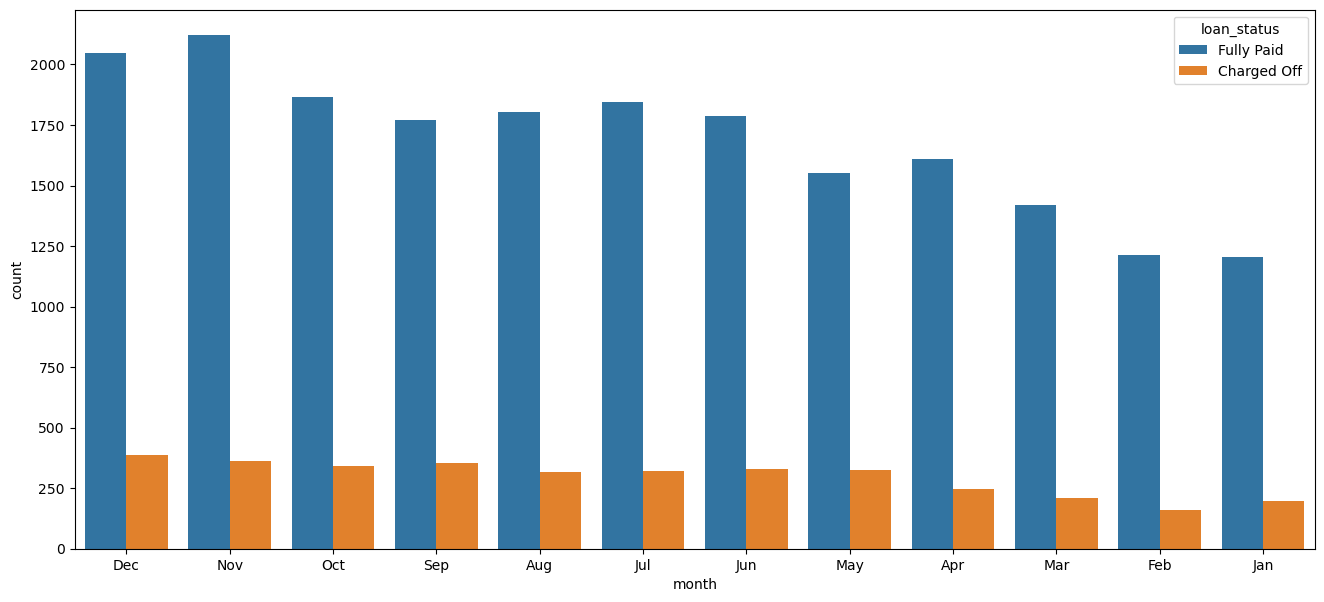

In [523]:
plt.figure(figsize=[16,7])
sns.countplot(data=loan_data, x='month', hue='loan_status'); 

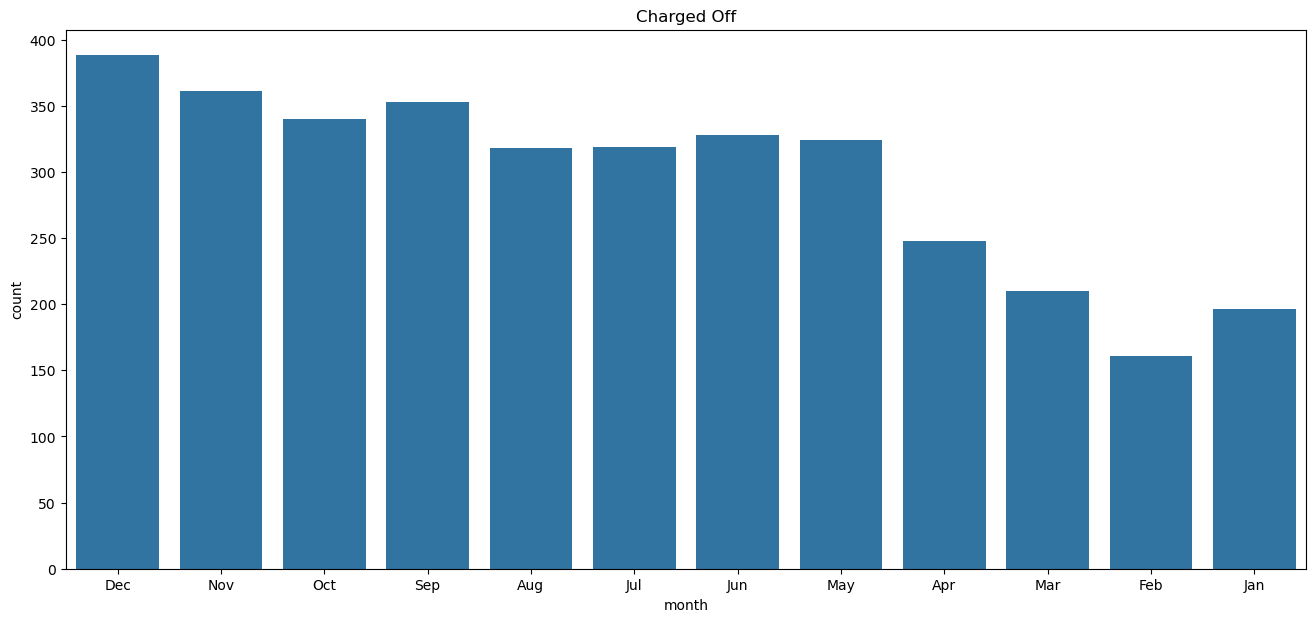

In [526]:
plt.figure(figsize=[16,7])
sns.countplot(data=loan_data[loan_data['loan_status'] == 'Charged Off'], x='month'); 
plt.title("Charged Off"); 

#### Inference 

* Maximum loan transactions happened in the month of Novemeber and December , with the lowest being in January . 

* Maximum defaulters where the ones who availed the loan in December and Novemeber , with the least defaulters being in the month of Feb , Jan . 

Reasons being : 
1. Holiday spending 

2. Year-end financial strain 

3. Seasonal Unemployment 

4. Bonus and Tax Refunds 


#### Analysing "installment"

Description : 

- 'installment' : The monthly payment owed by the borrower if the loan originates.

In [530]:
loan_data['installment'].describe()

count    23780.000000
mean       216.479563
std        106.539074
min         16.080000
25%        133.050000
50%        199.890000
75%        299.167500
max        494.970000
Name: installment, dtype: float64

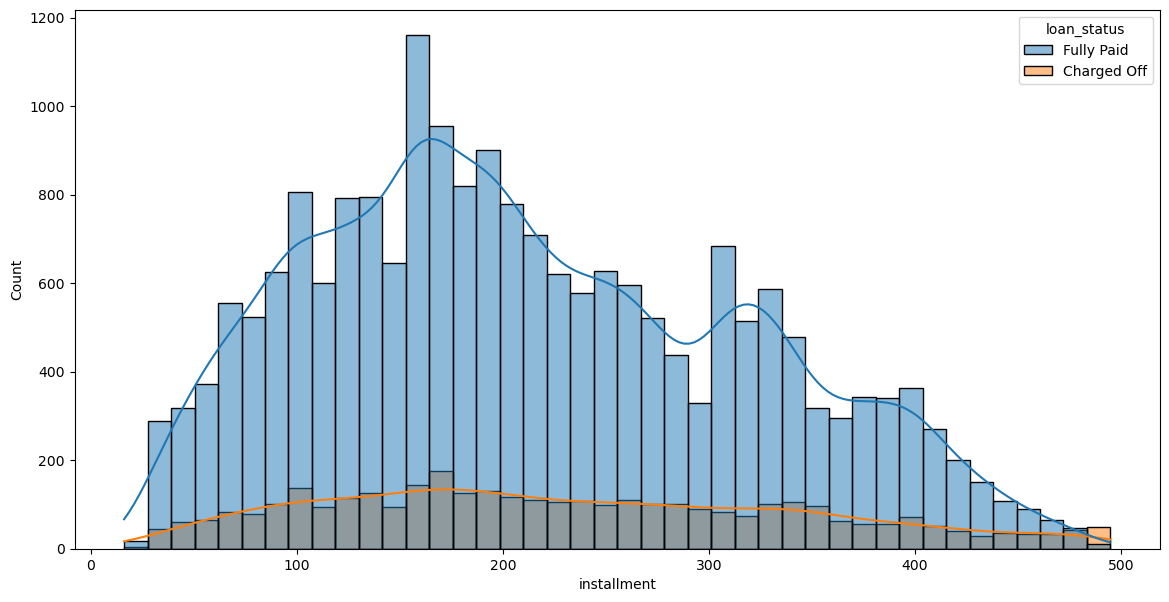

In [536]:
plt.figure(figsize=[14,7])
sns.histplot(data=loan_data, x='installment', hue='loan_status', kde=True); 

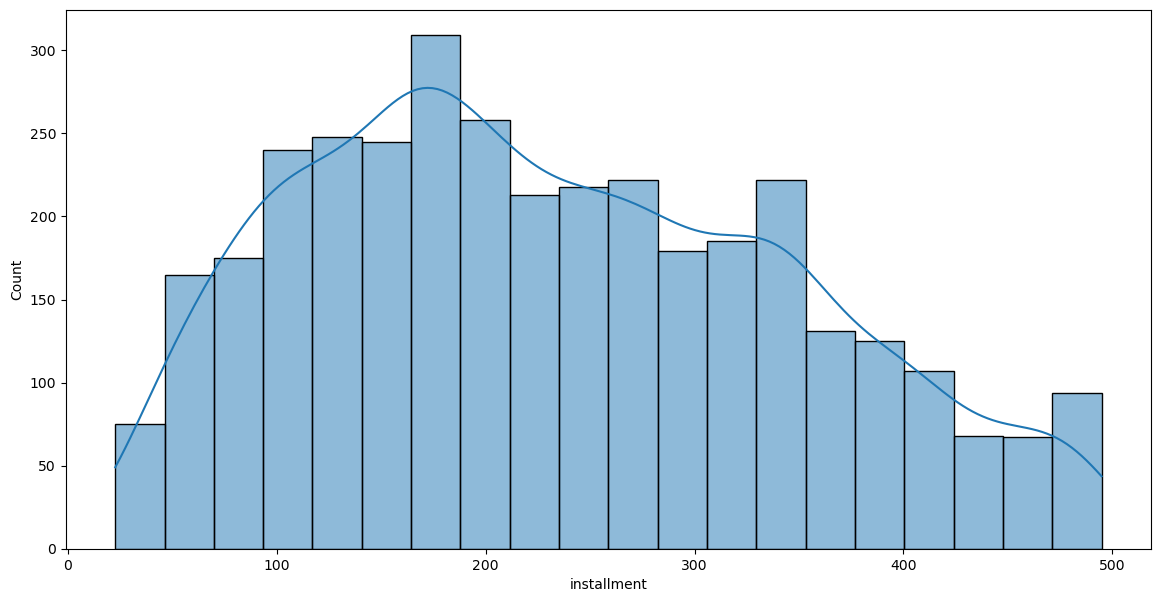

In [539]:
plt.figure(figsize=[14,7])
sns.histplot(data=loan_data[loan_data['loan_status'] == 'Charged Off'], x='installment', kde=True); 

#### Inference 
* Installment values tend to hover around $150 - $300 .
* There seems to be an uprise in the people who default on loans , who are paying ~ $500 . Investigating further .

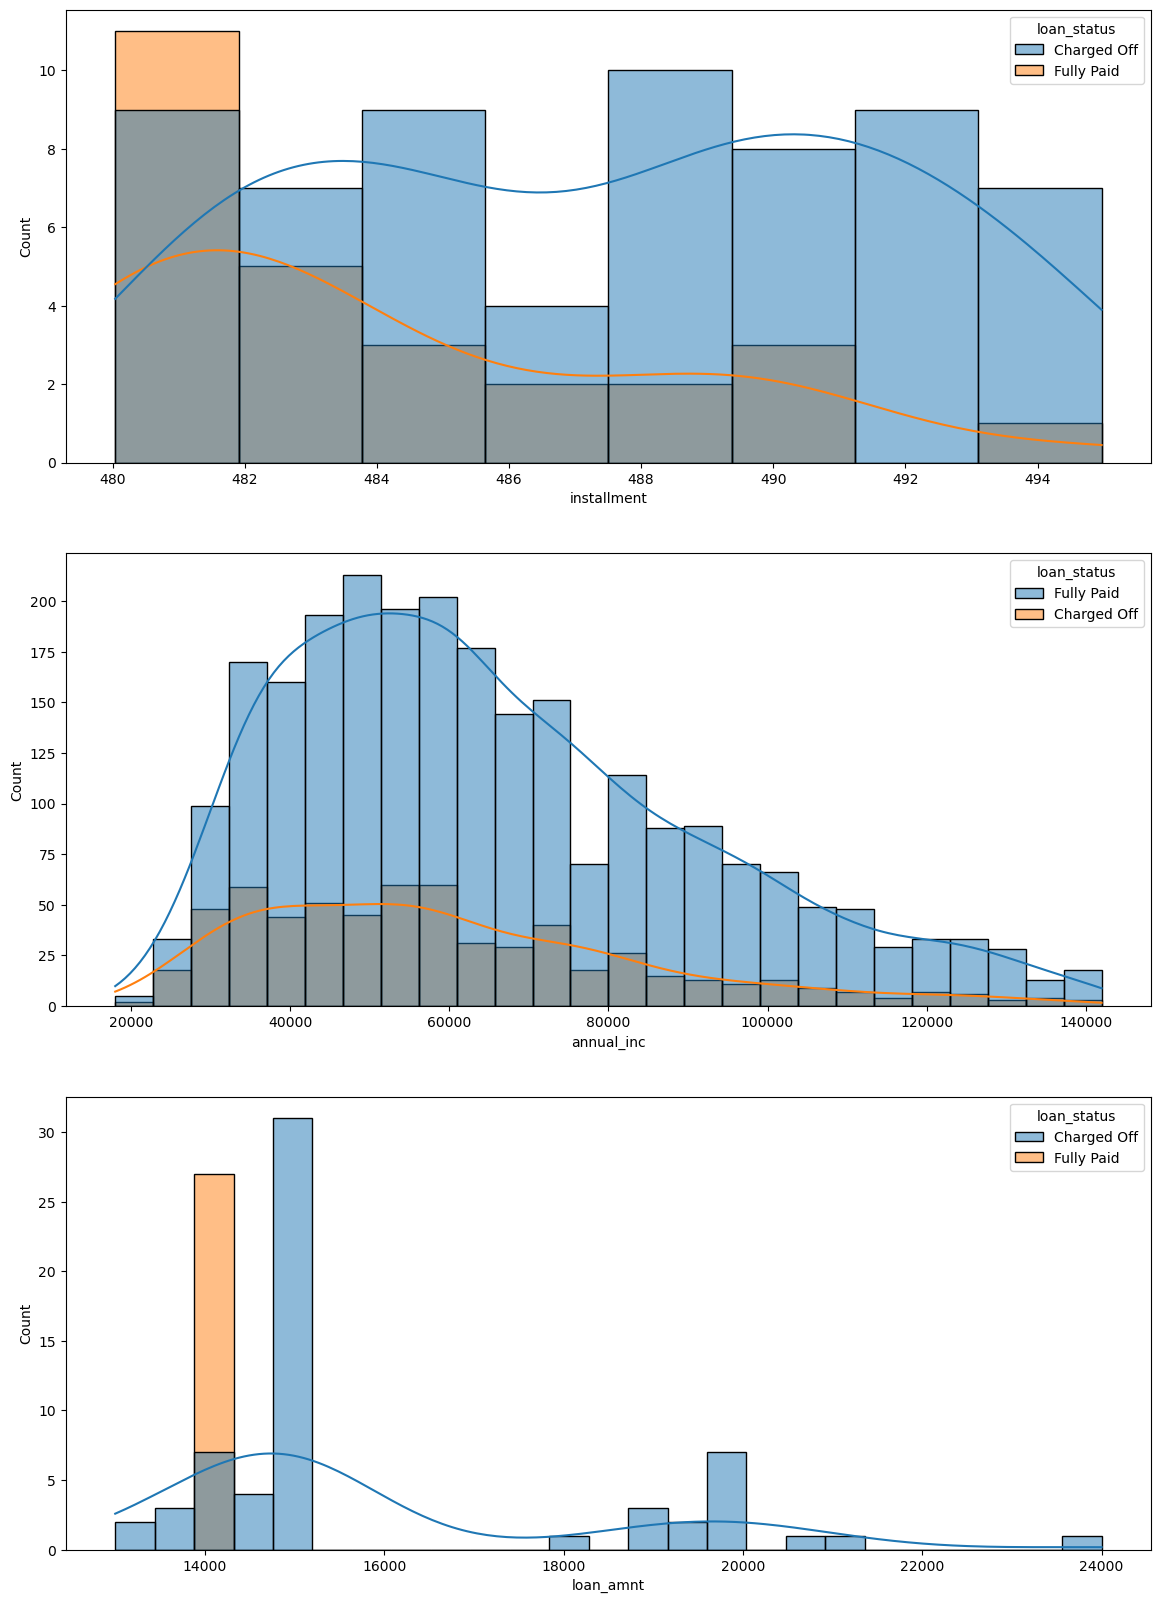

In [556]:
plt.figure(figsize=[14,20])

plt.subplot(3,1,1)
sns.histplot(data = loan_data[loan_data['installment'] > 480] , x='installment', hue='loan_status' , kde=True); 
plt.subplot(3,1,2)
sns.histplot(data = loan_data[loan_data['installment'] > 350] , x='annual_inc', hue='loan_status' , kde=True); 
plt.subplot(3,1,3)
sns.histplot(data = loan_data[loan_data['installment'] > 480] , x='loan_amnt', hue='loan_status' , kde=True); 



#### Inference 
* This is a big indicator of customers defaulting on their loans :

    - What we can observe from the chart above is higher 'installment' values , the customer defaults more than paying off the loan 

    - The same trend can be seen with the 'loan_amnt' , higher loan amounts end up defaulting 
    
    - But the same can not be said for the 'annual_income' of the individual .

Reasons behind this phenomenon : 
* Higher installments means a significant portion of their income goes to repaying the loans . Unexpected expenses can falter that  . 

* Underestimation of Repayment Capacity 


#### Analysing 'dti' 

Description : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

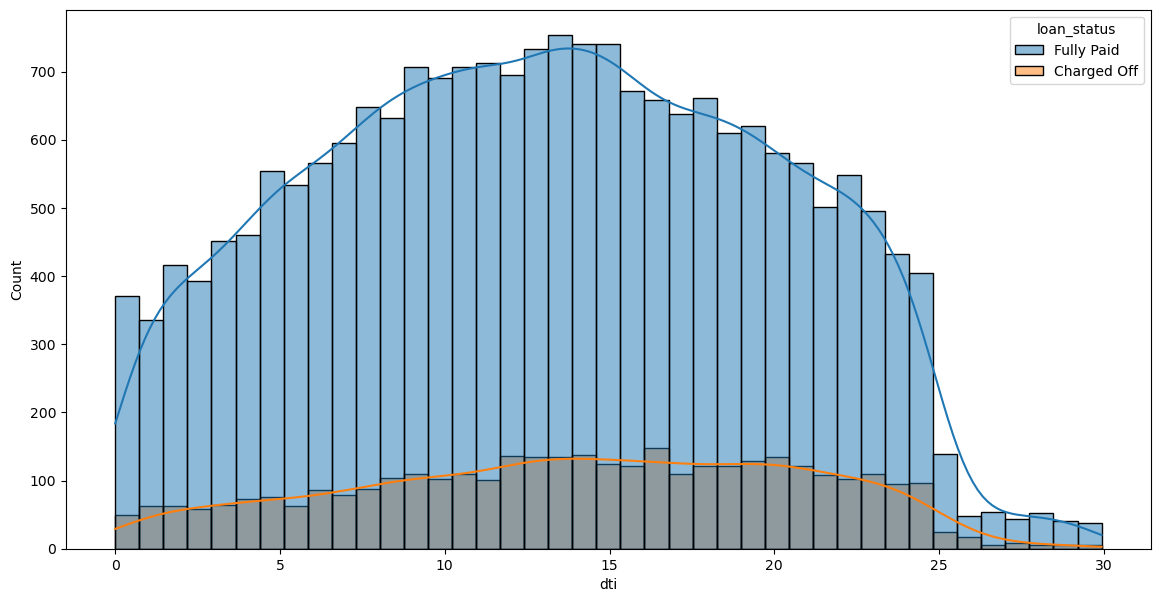

In [558]:
plt.figure(figsize=[14,7])
sns.histplot(data=loan_data, x='dti', hue='loan_status', kde=True); 

#### Inference 

* Does not give us too much to go on . 

#### Analysing "annual_inc" 

Description : The self-reported annual income provided by the borrower during registration.



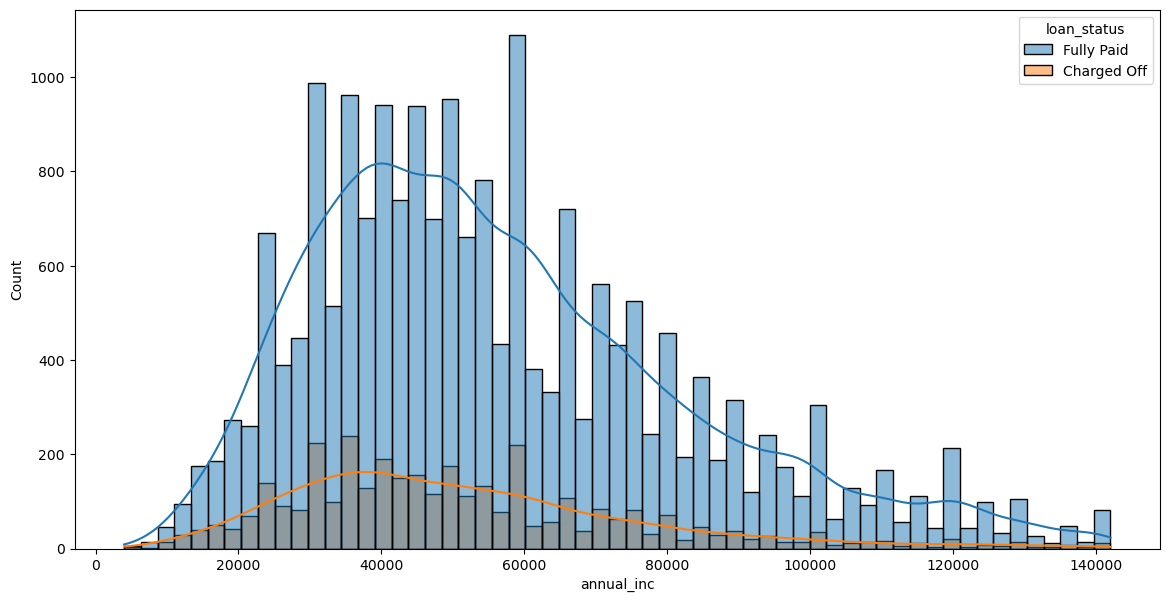

In [559]:
plt.figure(figsize=[14,7])
sns.histplot(data=loan_data, x='annual_inc', hue='loan_status', kde=True); 

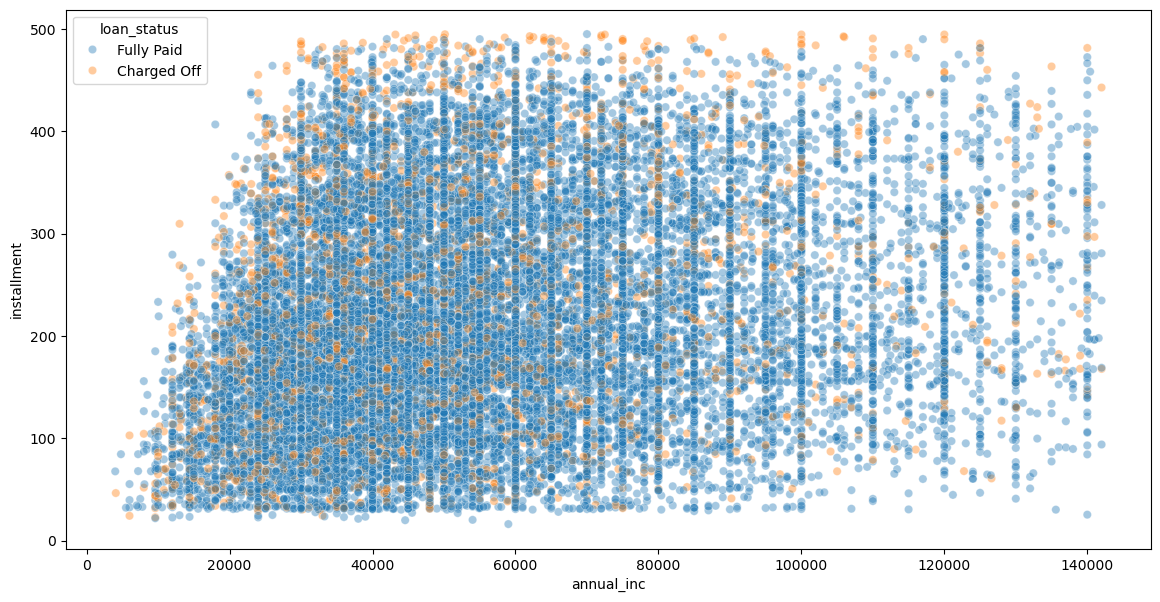

In [562]:
plt.figure(figsize=[14,7])
sns.scatterplot(data=loan_data, x='annual_inc', y='installment', hue='loan_status', alpha=0.4); 

#### Inference 

* While 'annual_inc' in itself gives us little insights , some insights can be inferred when comparing with 'installment' 

* High installment loans are distributed across all income levels, and defaults occur in both low and high-income groups. This implies that loan risk assessments should incorporate additional factors beyond just income and installment values.

#### Analysing 'annual_inc' with 'loan_amnt' 

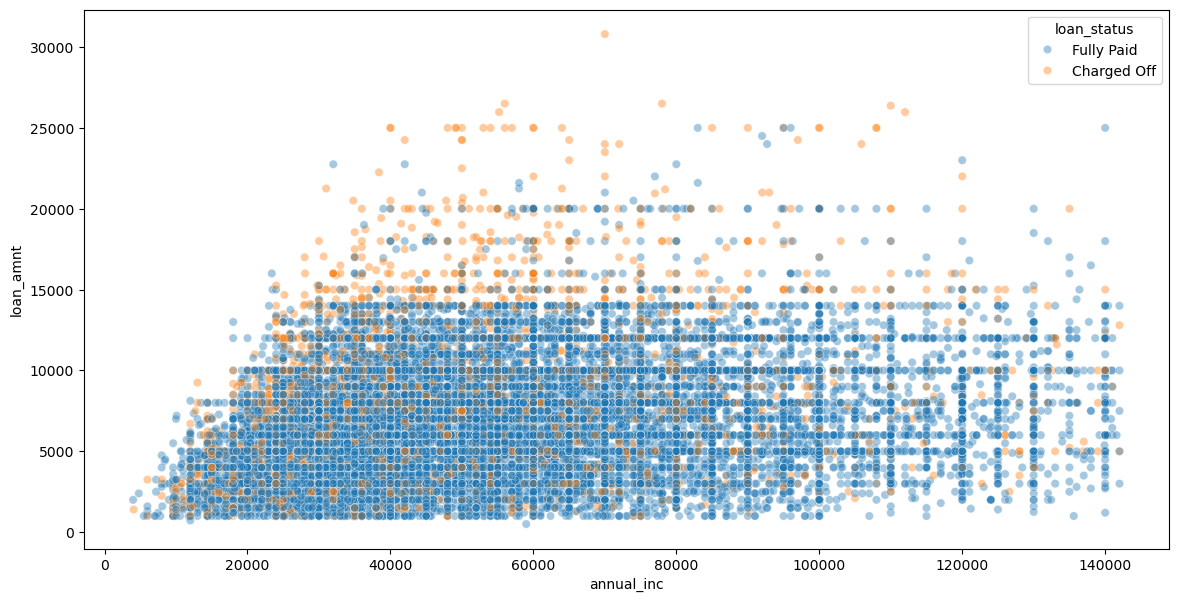

In [570]:
plt.figure(figsize=[14,7])
sns.scatterplot(data=loan_data, x='annual_inc', y='loan_amnt', hue='loan_status', alpha=0.4); 

#### Inference 

* While customers defaulted on every annual_inc level , most defaulters where the ones whose income wasnt on the higher side , but the loan availed was high , thus making it harder to pay and therefore defaulting . 

#### Analysing 'annual_inc' with 'int_rate' 

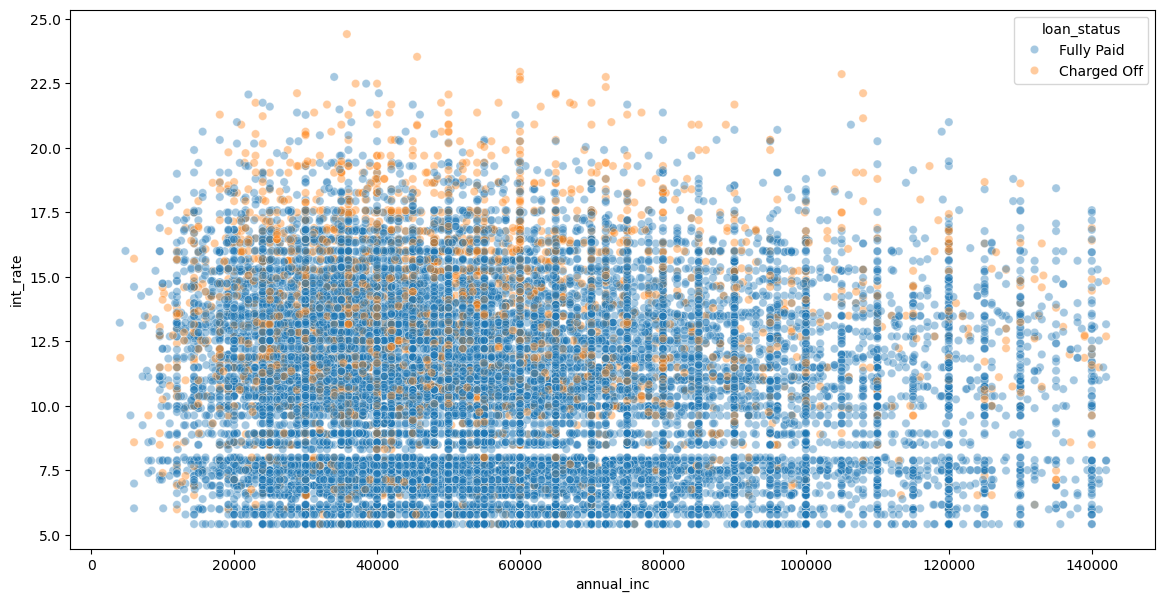

In [571]:
plt.figure(figsize=[14,7])
sns.scatterplot(data=loan_data, x='annual_inc', y='int_rate', hue='loan_status', alpha=0.4); 

#### Inference 

* A same occurence can be seen across 'int_rate' and 'annual_inc' , where people with median annual_inc , who availed a higher interest loan , seemed to default the most . 

#### Analyse 'loan_amnt' with 'month' issued

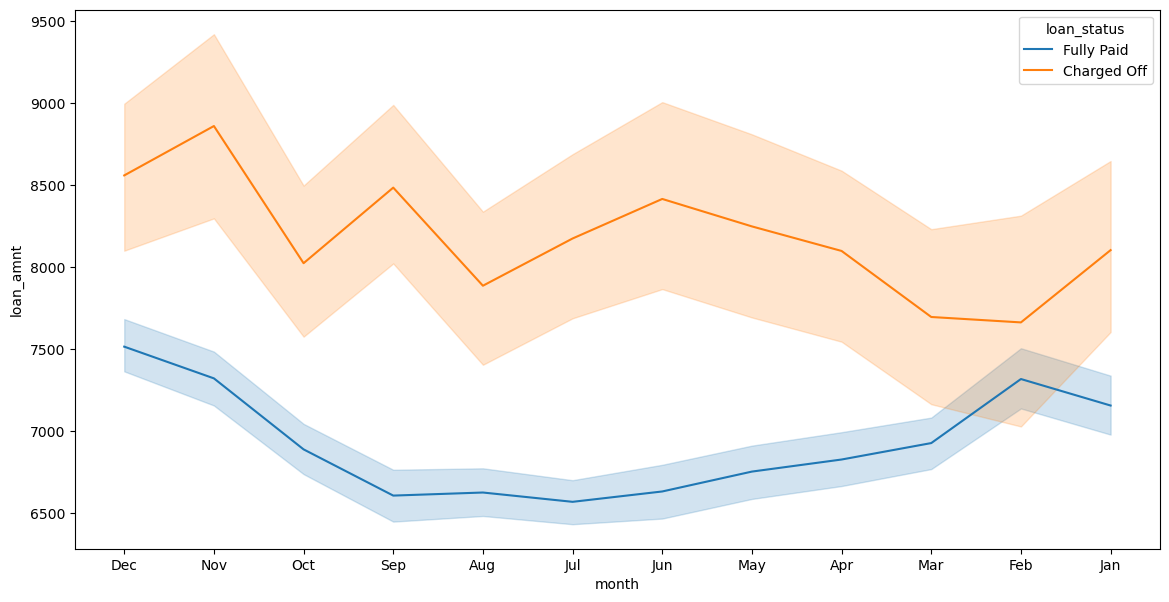

In [574]:
plt.figure(figsize=(14,7))
sns.lineplot(data =loan_data,y='loan_amnt', x='month', hue ='loan_status'); 

#### Inference 

The chart suggests a correlation between higher loan amounts and an increased likelihood of default. 

Seasonal trends indicate that borrowers tend to take out larger loans towards the end of the year, which also coincides with a higher rate of loan defaults. 

This analysis highlights the importance of considering both the loan amount and the time of year when assessing loan risk.

#### Analysing "loan_amnt' with "emp_length" 

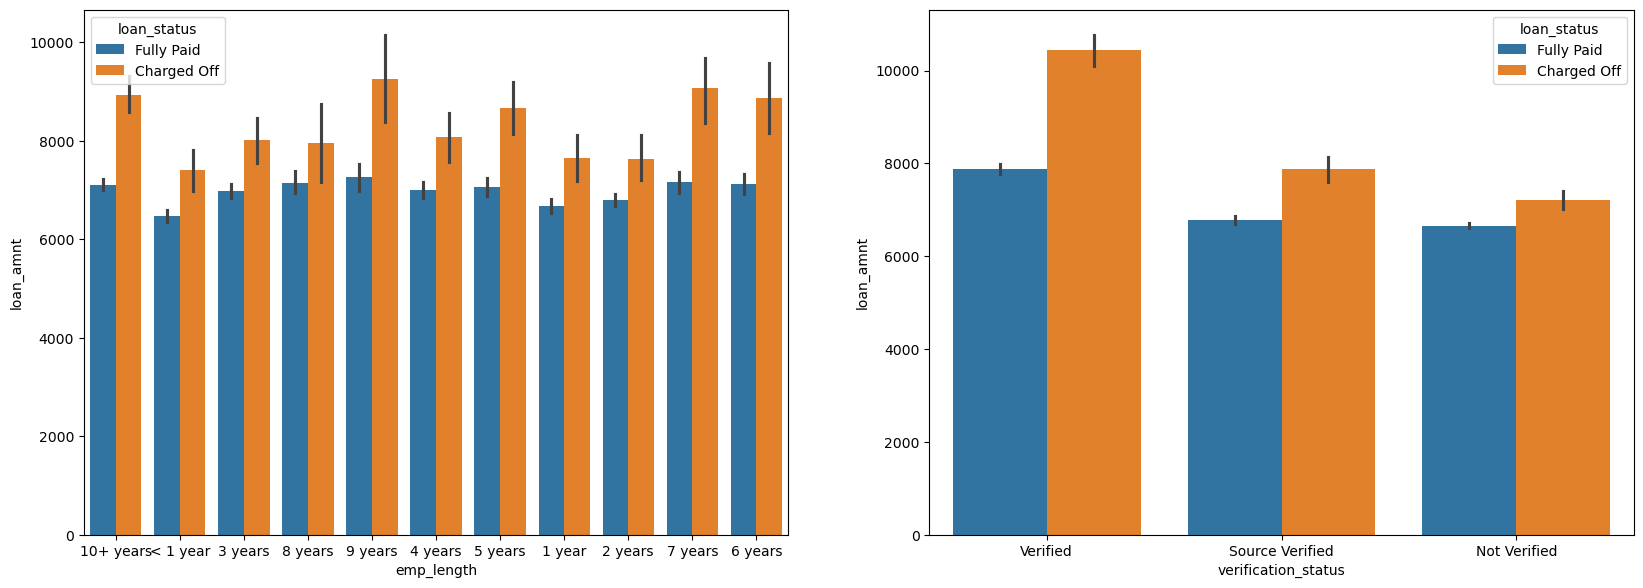

In [586]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(2,2,2)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status'); 

#### Inference 

Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

## Closing Statement for the Lending Club Case Study 

<b>In conclusion, our comprehensive analysis of the given dataset has provided valuable insights into the patterns and factors influencing loan performance. 

Through various visualizations and statistical analyses, we have uncovered significant trends and correlations that can inform better decision-making for both lenders and borrowers.</b>